In [1]:
import os
import ulmo   # fetch snotel
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
import geopandas as gpd
from shapely import wkt
import contextily as ctx
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from shapely.geometry import shape, Point, Polygon, box

In [2]:
import statistics

In [3]:
# start_date = datetime(1999,10,1)
# end_date = datetime(2004,9,30)
start_date = datetime(1985,10,1)
end_date = datetime(2016,9,30)

In [4]:
# pr_prism_temp_prism_dir = '/global/cscratch1/sd/yum/swe/UofA_codebase_reproduction/v8/swe_part_pr_lag1_fltr_2_snw_szn_by_snw_acc_ok/'
# experiments_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/2000_to_2005/'
pr_prism_temp_prism_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/prism/'
experiments_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/'
save_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/analysis/bias_decomposition/'

In [5]:
# Peak SWE
# pr_gridmet_temp_prism_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/2000_to_2005/pr_gridmet/'
# pr_prism_temp_gridmet_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/2000_to_2005/temp_gridmet/'
# pr_gridmet_temp_gridmet_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/2000_to_2005/pr_gridmet_temp_gridmet/'
# pr_livneh_temp_prism_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/2000_to_2005/pr_livneh21/'
# pr_prism_temp_livneh_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/2000_to_2005/temp_livneh21/'
# pr_livneh_temp_livneh_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/2000_to_2005/pr_livneh21_temp_livneh21/'
# th_jennings_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/2000_to_2005/th_jennings/'
pr_gridmet_temp_prism_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/pr_gridmet/'
pr_prism_temp_gridmet_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/temp_gridmet/'
pr_gridmet_temp_gridmet_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/pr_gridmet_temp_gridmet/'
pr_livneh_temp_prism_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/pr_livneh21/'
pr_prism_temp_livneh_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/temp_livneh21/'
pr_livneh_temp_livneh_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/pr_livneh21_temp_livneh21/'
th_jennings_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/th_jennings/'

In [5]:
# Accumulation SWE
pr_gridmet_temp_prism_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/acc_pr_gridmet/'
pr_prism_temp_gridmet_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/acc_temp_gridmet/'
pr_gridmet_temp_gridmet_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/acc_pr_gridmet_temp_gridmet/'
pr_livneh_temp_prism_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/acc_pr_livneh21/'
pr_prism_temp_livneh_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/acc_temp_livneh21/'
pr_livneh_temp_livneh_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/acc_pr_livneh21_temp_livneh21/'
th_jennings_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/th_jennings/'

In [ ]:
# Ablation SWE
pr_gridmet_temp_prism_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/abl_pr_gridmet/'
pr_prism_temp_gridmet_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/abl_temp_gridmet/'
pr_gridmet_temp_gridmet_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/abl_pr_temp_gridmet/'
pr_livneh_temp_prism_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/abl_pr_livneh21/'
pr_prism_temp_livneh_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/abl_temp_livneh21/'
pr_livneh_temp_livneh_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/abl_pr_livneh21_temp_livneh21/'
th_jennings_dir = '/global/cscratch1/sd/yum/swe/UofA_bias_decomposition/experiments/1985_to_2016/prism/'

In [6]:
# for each experiment:
#    for each station:
#       get peak SWE (1 april SWE) across years
#       average peak SWE across years
#    average peak SWE across stations
#    calculate difference (compared to SNOTEL baseline)

In [6]:
# Load list of SNOTEL sites with available data
sites_df = pd.read_csv("sites_df.csv", index_col='Unnamed: 0')

In [7]:
sites_df['geometry'] = sites_df['geometry'].apply(wkt.loads)

In [8]:
# Convert to a Geopandas gdf
sites_gdf = gpd.GeoDataFrame(sites_df, crs='EPSG:4326')

In [9]:
# Get shapefile for Upper Colorado Riber Basin (UCRB)
uc_shp = "/global/cscratch1/sd/yum/swe/Upper_Colorado_River_Basin_Boundary/Upper_Colorado_River_Basin_Boundary.shp"

# Read UCRB shapefile
gm_poly_gdf = gpd.read_file(uc_shp, encoding="utf-8")

# Get bounds of UCRB
gm_poly_geom = gm_poly_gdf.iloc[0].geometry

# Determine sites in UCRB
sites_idx = sites_gdf.intersects(gm_poly_geom)

# Subset df to sites in UCRB
gm_snotel_sites = sites_gdf.loc[sites_idx]

# Calculate bias of each peak SWE; proportions - 08/19/22

In [11]:
# for each experiment:
#    for each station:
#       get peak SWE (1 april SWE) across years (for each year)
#       calculate difference in peak SWE (compared to SNOTEL baseline)
# boxplot of peak SWE differences 

## Compute peak SWE (for each station and year)

In [12]:
def get_peak_swe(df, column):    # adapted from swe_triange_metrics function in swe_triangle_metrics.ipynb
    if column == 'snotel_swe':
        swe = df['snotel_swe']
    elif column == 'ua_swe':
        swe = df['ua_swe']
    elif column == 'my_scaled_swe':
        swe = df['final_scaled_swe']
    elif column == 'my_krig_scaled_swe':
        swe = df['krig_scaled_swe']
    else:
        raise ValueError('Unexpected column.')    
    
    # SPD (peak swe) date
    spd_date = pd.to_datetime(df['datetime'].loc[swe.idxmax()])   #spd_date_yr = pd.to_datetime(df['datetime'].loc[df['final_scaled_swe'].idxmax()])
    # SPD SWE depth
    spd_depth = swe.loc[swe.idxmax()]   #spd_swe_yr = df['final_scaled_swe'].loc[df['final_scaled_swe'].idxmax()]
    
    return spd_date, spd_depth

In [13]:
def peak_swe_arr(df, column, year, date_run, metric_run):    # adapted from metrics_arr function in swe_triangle_metrics.ipynb
    yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,7,31)) & (pd.to_datetime(df['datetime']) < datetime(year+1,8,1))]
    # yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,10,1)) & (pd.to_datetime(df['datetime']) < datetime(year+1,6,30))]
    peak_swe_date, peak_swe_depth = get_peak_swe(yr_df, column)
    # x_run.extend((0, peak_swe_date))
    # y_run.extend((0, peak_swe_depth))
    date_run.append(peak_swe_date)
    metric_run.append(peak_swe_depth)
    return date_run, metric_run

In [14]:
# initialize lists
site_code = []
year = []
pswe_date_snotel, pswe_snotel = [], []
pswe_date_ua, pswe_ua = [], [] 
pswe_date_pprism_tprism, pswe_pprism_tprism = [], []
pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = [], []
pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = [], []
pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = [], []
pswe_date_plivneh_tprism, pswe_plivneh_tprism = [], []
pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = [], []
pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = [], []
pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = [], []

In [15]:
for idx, row in gm_snotel_sites.iterrows():
    sitecode = row['code']
    print(sitecode)
    # site_lon, site_lat = row['geometry'].x, row['geometry'].y
    
    if os.path.exists(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv') and sitecode != '396_UT_SNTL' and sitecode != '435_UT_SNTL':
        # Load data
        pr_prism_temp_prism_df = pd.read_csv(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_gridmet_temp_prism_df = pd.read_csv(f'{pr_gridmet_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_gridmet_df = pd.read_csv(f'{pr_prism_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_gridmet_temp_gridmet_df = pd.read_csv(f'{pr_gridmet_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_livneh_temp_prism_df = pd.read_csv(f'{pr_livneh_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_livneh_df = pd.read_csv(f'{pr_prism_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_livneh_temp_livneh_df = pd.read_csv(f'{pr_livneh_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_prism_th_jennings_df = pd.read_csv(f'{th_jennings_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        
        for yr in np.unique(pd.to_datetime(pr_prism_temp_prism_df['datetime']).dt.year)[:-1]:
            # print(yr)
            site_code.append(sitecode)
            year.append(yr)
            pswe_date_snotel, pswe_snotel = peak_swe_arr(pr_prism_temp_prism_df, 'snotel_swe', yr, pswe_date_snotel, pswe_snotel)
            pswe_date_ua, pswe_ua = peak_swe_arr(pr_prism_temp_prism_df, 'ua_swe', yr, pswe_date_ua, pswe_ua)
            pswe_date_pprism_tprism, pswe_pprism_tprism = peak_swe_arr(pr_prism_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism, pswe_pprism_tprism)
            pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = peak_swe_arr(pr_gridmet_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tprism, pswe_pgridmet_tprism)
            pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = peak_swe_arr(pr_prism_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pprism_tgridmet, pswe_pprism_tgridmet)
            pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = peak_swe_arr(pr_gridmet_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet)
            pswe_date_plivneh_tprism, pswe_plivneh_tprism = peak_swe_arr(pr_livneh_temp_prism_df, 'my_scaled_swe', yr, pswe_date_plivneh_tprism, pswe_plivneh_tprism)
            pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = peak_swe_arr(pr_prism_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_pprism_tlivneh, pswe_pprism_tlivneh)
            pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = peak_swe_arr(pr_livneh_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh)
            pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = peak_swe_arr(pr_prism_temp_prism_th_jennings_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings)
            

1030_CO_SNTL
305_CO_SNTL
8082_UT_SNTL
317_WY_SNTL
1061_CO_SNTL
1041_CO_SNTL
1143_AZ_SNTL
342_WY_SNTL
345_CO_SNTL
348_UT_SNTL
1185_CO_SNTL
1162_UT_SNTL
353_WY_SNTL
368_UT_SNTL
371_UT_SNTL
1192_UT_SNTL
1153_UT_SNTL
913_CO_SNTL
378_CO_SNTL
380_CO_SNTL
383_UT_SNTL
386_CO_SNTL
387_CO_SNTL
247_CO_SNTL
1101_CO_SNTL
396_UT_SNTL
409_CO_SNTL
904_CO_SNTL
415_CO_SNTL
1236_UT_SNTL
426_CO_SNTL
432_UT_SNTL
435_UT_SNTL
444_UT_SNTL
449_WY_SNTL
452_UT_SNTL
457_CO_SNTL
461_UT_SNTL
1163_UT_SNTL
465_CO_SNTL
467_CO_SNTL
468_WY_SNTL
1252_CO_SNTL
1120_CO_SNTL
1149_UT_SNTL
481_UT_SNTL
1186_CO_SNTL
505_CO_SNTL
248_CO_SNTL
509_WY_SNTL
521_UT_SNTL
522_UT_SNTL
1187_CO_SNTL
528_UT_SNTL
538_CO_SNTL
542_CO_SNTL
543_UT_SNTL
544_WY_SNTL
547_CO_SNTL
970_CO_SNTL
554_WY_SNTL
555_WY_SNTL
556_CO_SNTL
559_UT_SNTL
565_CO_SNTL
566_UT_SNTL
1116_UT_SNTL
513_UT_SNTL
572_UT_SNTL
1215_UT_SNTL
261_UT_SNTL
1047_WY_SNTL
586_CO_SNTL
589_CO_SNTL
1261_UT_SNTL
597_WY_SNTL
940_CO_SNTL
607_CO_SNTL
905_CO_SNTL
618_CO_SNTL
1040_CO_SNTL
622_CO

## Compute Biases/Differences

In [16]:
# UA difference
ua_bias = (np.array(pswe_ua) / np.array(pswe_snotel))

### Level 1

In [17]:
snotel_bias = (np.array(pswe_snotel) / np.array(pswe_snotel))

### Level 2

In [18]:
prism_bias = (np.array(pswe_pprism_tprism) / np.array(pswe_snotel))

### Level 3

#### 3ai

##### Gridmet

In [19]:
pgridmet_bias = (np.array(pswe_pgridmet_tprism) / np.array(pswe_pprism_tprism)) * (np.array(pswe_pprism_tprism) / np.array(pswe_snotel))

##### Livneh

In [20]:
plivneh_bias = (np.array(pswe_plivneh_tprism) / np.array(pswe_pprism_tprism)) * (np.array(pswe_pprism_tprism) / np.array(pswe_snotel))

#### 3aii

##### Gridmet

In [21]:
tgridmet_bias = (np.array(pswe_pprism_tgridmet) / np.array(pswe_pprism_tprism)) * (np.array(pswe_pprism_tprism) / np.array(pswe_snotel))

##### Livneh

In [22]:
tlivneh_bias = (np.array(pswe_pprism_tlivneh) / np.array(pswe_pprism_tprism)) * (np.array(pswe_pprism_tprism) / np.array(pswe_snotel))

#### 3aiii

##### Gridmet

In [23]:
ptgridmet_bias = (np.array(pswe_pgridmet_tgridmet) / np.array(pswe_pprism_tprism)) * (np.array(pswe_pprism_tprism) / np.array(pswe_snotel))

##### Livneh

In [24]:
ptlivneh_bias = (np.array(pswe_plivneh_tlivneh) / np.array(pswe_pprism_tprism)) * (np.array(pswe_pprism_tprism) / np.array(pswe_snotel))

#### 3b

In [25]:
thjennings_bias = (np.array(pswe_pprism_tprism_thjennings) / np.array(pswe_pprism_tprism)) * (np.array(pswe_pprism_tprism) / np.array(pswe_snotel))

## Plots

### Boxplot of all peak SWE differences

In [26]:
pswe_diff_df = pd.DataFrame(list(zip(snotel_bias, prism_bias, pgridmet_bias, tgridmet_bias, ptgridmet_bias, plivneh_bias, tlivneh_bias, ptlivneh_bias, thjennings_bias)), 
                                 columns = ['SNOTEL', 'PRISM', 'GridMetP', 'GridMetT', 'GridMetPT', 'LivnehP', 'LivnehT', 'LivnehPT', 'JenningsTh'])

In [27]:
# convert to %
pswe_diff_df = pswe_diff_df*100

In [28]:
# flip order of runs (i.e. columns)
pswe_diff_df = pswe_diff_df.iloc[:, ::-1]

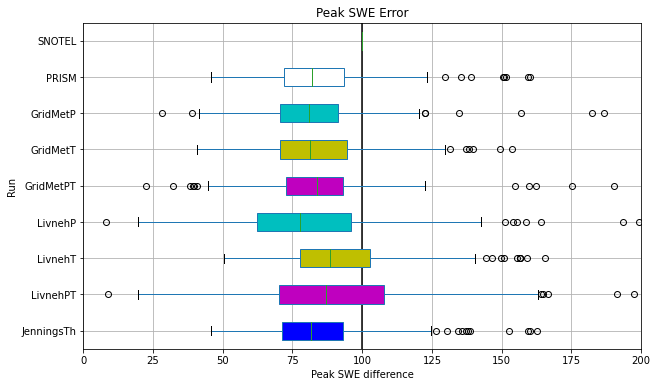

In [29]:
# colors = ['w', 'w', 'c', 'y', 'm', 'c', 'y', 'm']
colors = ['b', 'm', 'y', 'c', 'm', 'y', 'c', 'w', 'w']

fig,ax = plt.subplots(figsize=(10,6)) 
plt.axvline(100, color='black')
ax,props = pswe_diff_df.plot.box(patch_artist=True, return_type='both', ax=ax, vert=False)
for patch,color in zip(props['boxes'],colors):
    patch.set_facecolor(color)
plt.grid()
plt.xlim(0,200)
plt.xlabel('Peak SWE difference')
plt.ylabel('Run')
plt.title('Peak SWE Error')
plt.savefig(save_dir+'boxplot_peak_swe_error_proportions', dpi=300)
# plt.show()

### Barplot of Mean Peak SWE

In [30]:
pswe_mean_diff_list = list(pswe_diff_df.mean())

In [31]:
pswe_mean_diff_df = pd.DataFrame(pswe_mean_diff_list, 
                                 index = ['JenningsTh', 'LivnehPT', 'LivnehT', 'LivnehP', 'GridMetPT', 'GridMetT', 'GridMetP', 'PRISM', 'SNOTEL'],
                                 columns = ['peak_swe_diff'])

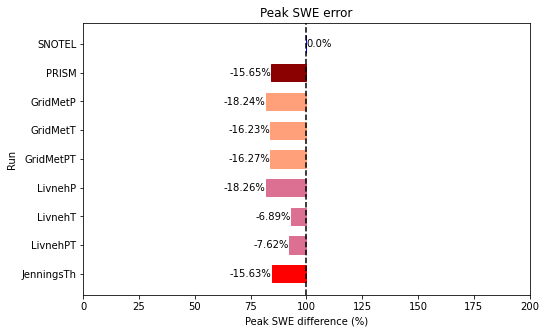

In [32]:
x = pswe_mean_diff_df.index.values
y_bot = [100, 100, 100, 100, 100, 100, 100, 100, 100]
y_dif = [pswe_mean_diff_df['peak_swe_diff'][i]-100 for i in range(9)]  

lbls = [f'{round(item, 2)}%' for item in y_dif]

plt.figure(figsize=(8,5))
bars = plt.barh(x, width=y_dif, height=0.6, left=y_bot)
# plt.bar_label(bars, fmt='%.2f')
plt.bar_label(bars, labels=lbls)
plt.title('Peak SWE error')
plt.xlabel('Peak SWE difference (%)')
plt.ylabel('Run')
plt.axvline(100, color='k', linestyle='--')
for color, bar in zip(['red','palevioletred','palevioletred','palevioletred','lightsalmon','lightsalmon','lightsalmon','darkred','blue'], bars.patches):
    bar.set_color(color)
plt.xlim(0,200)
plt.savefig(save_dir+'boxplot_mean_peak_swe_error_proportions', dpi=300)
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

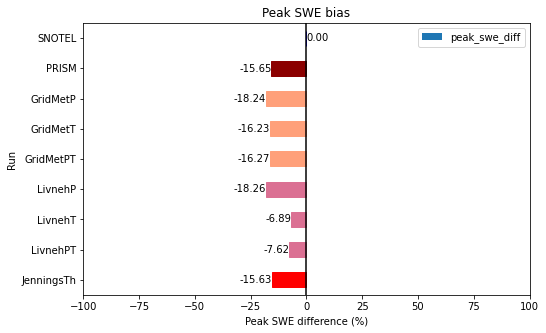

In [198]:
ax = (pswe_mean_diff_df-100).plot(kind='barh', figsize=(8,5))
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_xlim(-100,100)
ax.axvline(0, color='black')
ax.set_title('Peak SWE bias')
ax.set_xlabel('Peak SWE difference (%)')
ax.set_ylabel('Run')
for color, bar in zip(['red','palevioletred','palevioletred','palevioletred','lightsalmon','lightsalmon','lightsalmon','darkred','blue'], ax.patches):
    bar.set_color(color)
# plt.savefig(save_dir+'barplot_mean_peak_swe_bias.png', dpi=300)

In [11]:
# for each experiment:
#    for each station:
#       get peak SWE (1 april SWE) across years (for each year)
#       calculate difference in peak SWE (compared to SNOTEL baseline)
# boxplot of peak SWE differences 

# Compute peak SWE (for each station and year) by function call

In [10]:
def get_peak_swe(df, column):    # adapted from swe_triange_metrics function in swe_triangle_metrics.ipynb
    if column == 'snotel_swe':
        swe = df['snotel_swe']
    elif column == 'ua_swe':
        swe = df['ua_swe']
    elif column == 'my_scaled_swe':
        swe = df['final_scaled_swe']
    elif column == 'my_krig_scaled_swe':
        swe = df['krig_scaled_swe']
    else:
        raise ValueError('Unexpected column.')    
    
    # SPD (peak swe) date
    spd_date = pd.to_datetime(df['datetime'].loc[swe.idxmax()])   #spd_date_yr = pd.to_datetime(df['datetime'].loc[df['final_scaled_swe'].idxmax()])
    # SPD SWE depth
    spd_depth = swe.loc[swe.idxmax()]   #spd_swe_yr = df['final_scaled_swe'].loc[df['final_scaled_swe'].idxmax()]
    
    return spd_date, spd_depth

In [11]:
def peak_swe_arr(df, column, year, date_run, metric_run):    # adapted from metrics_arr function in swe_triangle_metrics.ipynb
    yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,7,31)) & (pd.to_datetime(df['datetime']) < datetime(year+1,8,1))]
    # yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,10,1)) & (pd.to_datetime(df['datetime']) < datetime(year+1,6,30))]
    peak_swe_date, peak_swe_depth = get_peak_swe(yr_df, column)
    # x_run.extend((0, peak_swe_date))
    # y_run.extend((0, peak_swe_depth))
    date_run.append(peak_swe_date)
    metric_run.append(peak_swe_depth)
    return date_run, metric_run

In [ ]:
def generate_boxplot():
    

In [ ]:
def mean_error_decomp_plot():
    

In [ ]:
def median_error_decomp_plot():
    

In [19]:
def get_error_decomposition_plots(pr_prism_temp_prism_dir, pr_gridmet_temp_prism_dir, pr_prism_temp_gridmet_dir, pr_gridmet_temp_gridmet_dir, pr_livneh_temp_prism_dir, pr_prism_temp_livneh_dir, th_jennings_dir):
    # Initialize lists
    site_code = []
    year = []
    pswe_date_snotel, pswe_snotel = [], []
    pswe_date_ua, pswe_ua = [], [] 
    pswe_date_pprism_tprism, pswe_pprism_tprism = [], []
    pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = [], []
    pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = [], []
    pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = [], []
    pswe_date_plivneh_tprism, pswe_plivneh_tprism = [], []
    pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = [], []
    pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = [], []
    pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = [], []
    
    # Get peak SWE value for each run
    for idx, row in gm_snotel_sites.iterrows():
        sitecode = row['code']
        # print(sitecode)
        # site_lon, site_lat = row['geometry'].x, row['geometry'].y

        if os.path.exists(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv') and sitecode != '396_UT_SNTL' and sitecode != '435_UT_SNTL':
            # Load data
            pr_prism_temp_prism_df = pd.read_csv(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
            pr_gridmet_temp_prism_df = pd.read_csv(f'{pr_gridmet_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
            pr_prism_temp_gridmet_df = pd.read_csv(f'{pr_prism_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
            pr_gridmet_temp_gridmet_df = pd.read_csv(f'{pr_gridmet_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
            pr_livneh_temp_prism_df = pd.read_csv(f'{pr_livneh_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
            pr_prism_temp_livneh_df = pd.read_csv(f'{pr_prism_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
            pr_livneh_temp_livneh_df = pd.read_csv(f'{pr_livneh_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
            pr_prism_temp_prism_th_jennings_df = pd.read_csv(f'{th_jennings_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')

            for yr in np.unique(pd.to_datetime(pr_prism_temp_prism_df['datetime']).dt.year)[:-1]:
                # print(yr)
                site_code.append(sitecode)
                year.append(yr)
                pswe_date_snotel, pswe_snotel = peak_swe_arr(pr_prism_temp_prism_df, 'snotel_swe', yr, pswe_date_snotel, pswe_snotel)
                pswe_date_ua, pswe_ua = peak_swe_arr(pr_prism_temp_prism_df, 'ua_swe', yr, pswe_date_ua, pswe_ua)
                pswe_date_pprism_tprism, pswe_pprism_tprism = peak_swe_arr(pr_prism_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism, pswe_pprism_tprism)
                pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = peak_swe_arr(pr_gridmet_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tprism, pswe_pgridmet_tprism)
                pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = peak_swe_arr(pr_prism_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pprism_tgridmet, pswe_pprism_tgridmet)
                pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = peak_swe_arr(pr_gridmet_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet)
                pswe_date_plivneh_tprism, pswe_plivneh_tprism = peak_swe_arr(pr_livneh_temp_prism_df, 'my_scaled_swe', yr, pswe_date_plivneh_tprism, pswe_plivneh_tprism)
                pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = peak_swe_arr(pr_prism_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_pprism_tlivneh, pswe_pprism_tlivneh)
                pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = peak_swe_arr(pr_livneh_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh)
                pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = peak_swe_arr(pr_prism_temp_prism_th_jennings_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings)

    # Compute errors by level
    ua_bias = (np.array(pswe_ua) / np.array(pswe_snotel)) - 1
    snotel_bias = (np.array(pswe_snotel) / np.array(pswe_snotel)) - 1
    prism_bias = (np.array(pswe_pprism_tprism) / np.array(pswe_snotel)) - 1
    pgridmet_bias = ((np.array(pswe_pgridmet_tprism) / np.array(pswe_pprism_tprism)) - 1)
    plivneh_bias = ((np.array(pswe_plivneh_tprism) / np.array(pswe_pprism_tprism)) - 1)
    tgridmet_bias = ((np.array(pswe_pprism_tgridmet) / np.array(pswe_pprism_tprism)) - 1)
    tlivneh_bias = ((np.array(pswe_pprism_tlivneh) / np.array(pswe_pprism_tprism)) - 1)
    ptgridmet_bias = ((np.array(pswe_pgridmet_tgridmet) / np.array(pswe_pprism_tprism)) - 1)
    ptlivneh_bias = ((np.array(pswe_plivneh_tlivneh) / np.array(pswe_pprism_tprism)) - 1)
    thjennings_bias = ((np.array(pswe_pprism_tprism_thjennings) / np.array(pswe_pprism_tprism)) - 1)
    
    # Generate Boxplot
    pswe_diff_df = pd.DataFrame(list(zip(snotel_bias, prism_bias, pgridmet_bias, tgridmet_bias, ptgridmet_bias, plivneh_bias, tlivneh_bias, ptlivneh_bias, thjennings_bias)), 
                                 columns = ['SNOTEL', 'PRISM', 'GridMetP', 'GridMetT', 'GridMetPT', 'LivnehP', 'LivnehT', 'LivnehPT', 'JenningsTh'])
    pswe_diff_df = pswe_diff_df*100   # convert to %
    pswe_diff_df = pswe_diff_df.iloc[:, ::-1]       # flip order of runs (i.e. columns)
    #plot
    # colors = ['w', 'w', 'c', 'y', 'm', 'c', 'y', 'm']
    colors = ['b', 'm', 'y', 'c', 'm', 'y', 'c', 'w', 'w']

    fig,ax = plt.subplots(figsize=(10,6)) 
    plt.axvline(0, color='black')
    ax,props = pswe_diff_df.plot.box(patch_artist=True, return_type='both', ax=ax, vert=False)
    for patch,color in zip(props['boxes'],colors):
        patch.set_facecolor(color)
    plt.grid()
    plt.xlim(-100,100)
    plt.xlabel('Peak SWE difference (%)')
    plt.ylabel('Run')
    plt.title('Peak SWE Bias')
    # plt.savefig(save_dir+'boxplot_peak_swe_bias', dpi=300)
    # plt.show()
    
    # Generate error decomposition plot - mean
    lb_q, ub_q = 0.25, 0.75
    pswe_mean_diff_list = list(pswe_diff_df.mean())
    pswe_mean_diff_df = pd.DataFrame(pswe_mean_diff_list, 
                                     index = ['JenningsTh', 'LivnehPT', 'LivnehT', 'LivnehP', 'GridMetPT', 'GridMetT', 'GridMetP', 'PRISM', 'SNOTEL'],
                                     columns = ['peak_swe_diff'])
    prism_mean_peak_swe_bias = pswe_mean_diff_df['peak_swe_diff']['PRISM']
    #plot
    x = pswe_mean_diff_df.index.values
    y_bot = [prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, 0, 0]
    y_dif = [pswe_mean_diff_df['peak_swe_diff'][i] for i in range(7)] + [prism_mean_peak_swe_bias,0]

    lbls = [f'{round(item, 2)}%' for item in y_dif]

    # creating error
    lb = pd.DataFrame(data={'peak_swe_diff': pswe_diff_df.quantile(lb_q)})
    lb_diff = pswe_mean_diff_df - lb
    ub = pd.DataFrame(data={'peak_swe_diff': pswe_diff_df.quantile(ub_q)})
    ub_diff = ub - pswe_mean_diff_df
    xerror = np.vstack((lb_diff['peak_swe_diff'].to_numpy(), ub_diff['peak_swe_diff'].to_numpy()))

    # plt.figure(figsize=(8,5))
    plt.figure(figsize=(16,8))
    # bars = plt.barh(x, y_dif, height=0.6, left=y_bot)
    h = [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.85, 1]
    hnew = [i for i in h]
    bars = plt.barh(x, y_dif, xerr=xerror, height=hnew, left=y_bot, ecolor='k', error_kw=dict(lw=2, capsize=4, capthick=2))
    # plt.bar_label(bars, labels=lbls)    # label bars
    plt.title('Mean Peak SWE Error', fontsize=24)
    plt.xlabel('Peak SWE Difference (%)', fontsize=20)
    # plt.ylabel('Run')
    plt.axvline(0, color='k', linestyle='--', linewidth=2.5)
    plt.axvline(prism_mean_peak_swe_bias, color='grey', alpha=1.0, linestyle='--', linewidth=2.5)
    for color, bar in zip(['blue','deepskyblue','deepskyblue','palevioletred','skyblue','skyblue','lightsalmon','darkred','blue'], bars.patches):
        bar.set_color(color)
    plt.xlim(-50,50)

    # Working with axes
    for d in ["left", "top", "right"]:   # set plot spines to invisible
        plt.gca().spines[d].set_visible(False)
    plt.tick_params(axis='y', left=False)   # remove tick marks, keep tick labels

    # Text size/fonts
    # f = [16, 16, 16, 16, 16, 16, 16, 18, 20]
    # fnew = [i for i in f]
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tick_params(axis="y",direction="in", pad=-25)

    # plt.savefig('/global/cscratch1/sd/yum/swe/conferences/MtnClim/'+'mean_peak_swe_error', dpi=300)
    
    
    
    # Generate error decomposition plot - median
    lb_q, ub_q = 0.25, 0.75
    pswe_med_diff_list = list(pswe_diff_df.median())
    pswe_med_diff_df = pd.DataFrame(pswe_med_diff_list, 
                                    index = ['JenningsTh', 'LivnehPT', 'LivnehT', 'LivnehP', 'GridMetPT', 'GridMetT', 'GridMetP', 'PRISM', 'SNOTEL'],
                                    columns = ['peak_swe_diff'])
    prism_med_peak_swe_bias = pswe_med_diff_df['peak_swe_diff']['PRISM']
    #plot
    x = pswe_med_diff_df.index.values
    y_bot = [prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, 0, 0]
    y_dif = [pswe_med_diff_df['peak_swe_diff'][i] for i in range(7)] + [prism_med_peak_swe_bias,0]

    lbls = [f'{round(item, 2)}%' for item in y_dif]

    # creating error
    lb = pd.DataFrame(data={'peak_swe_diff': pswe_diff_df.quantile(lb_q)})
    lb_diff = pswe_med_diff_df - lb
    ub = pd.DataFrame(data={'peak_swe_diff': pswe_diff_df.quantile(ub_q)})
    ub_diff = ub - pswe_med_diff_df
    xerror = np.vstack((lb_diff['peak_swe_diff'].to_numpy(), ub_diff['peak_swe_diff'].to_numpy()))

    # plt.figure(figsize=(8,5))
    plt.figure(figsize=(16,8))
    # bars = plt.barh(x, y_dif, height=0.6, left=y_bot)
    h = [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.85, 1]
    hnew = [i for i in h]
    bars = plt.barh(x, y_dif, xerr=xerror, height=hnew, left=y_bot, ecolor='k', error_kw=dict(lw=2, capsize=4, capthick=2))
    # plt.bar_label(bars, labels=lbls)    # label bars
    plt.title('Median Peak SWE Error', fontsize=24)
    plt.xlabel('Median SWE Difference (%)', fontsize=20)
    # plt.ylabel('Run')
    plt.axvline(0, color='k', linestyle='--', linewidth=2.5)
    plt.axvline(prism_med_peak_swe_bias, color='grey', alpha=1.0, linestyle='--', linewidth=2.5)
    for color, bar in zip(['blue','deepskyblue','deepskyblue','palevioletred','skyblue','skyblue','lightsalmon','darkred','blue'], bars.patches):
        bar.set_color(color)
    plt.xlim(-50,50)

    # working with axes
    for d in ["left", "top", "right"]:   # set plot spines to invisible
        plt.gca().spines[d].set_visible(False)
    plt.tick_params(axis='y', left=False)   # remove tick marks, keep tick labels

    # text size/fonts
    # f = [16, 16, 16, 16, 16, 16, 16, 18, 20]
    # fnew = [i for i in f]
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tick_params(axis="y",direction="in", pad=-25)

    # plt.savefig('/global/cscratch1/sd/yum/swe/conferences/MtnClim/'+'med_peak_swe_error', dpi=300)

    return pswe_diff_df

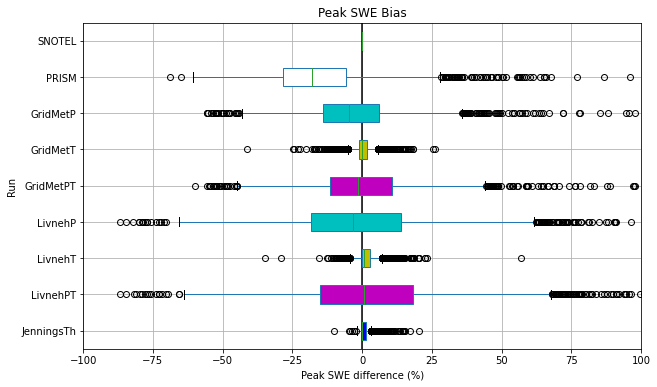

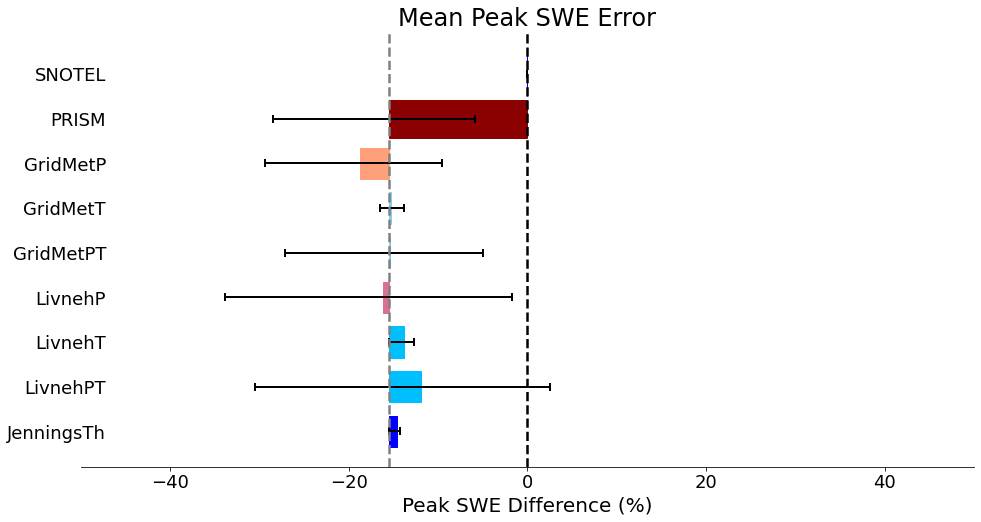

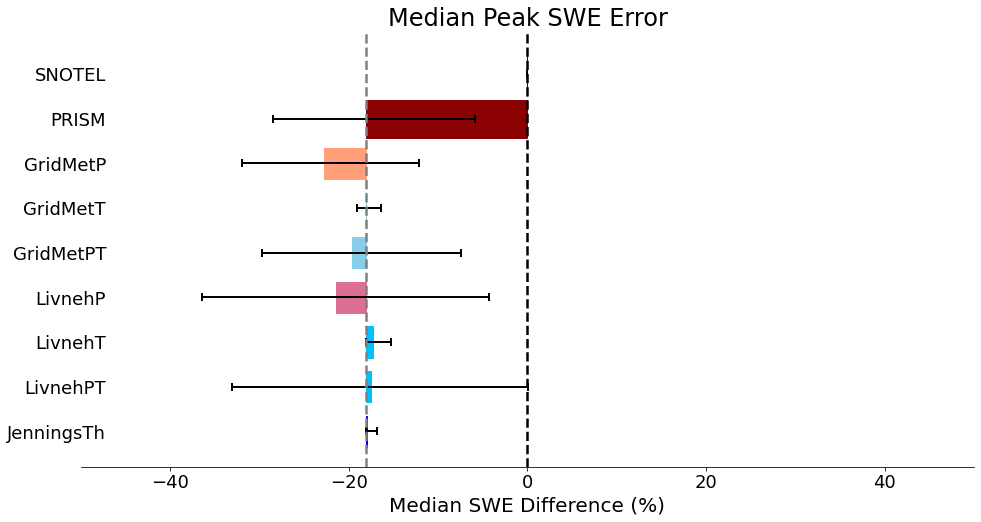

In [21]:
an = get_error_decomposition_plots(pr_prism_temp_prism_dir, pr_gridmet_temp_prism_dir, pr_prism_temp_gridmet_dir, pr_gridmet_temp_gridmet_dir, pr_livneh_temp_prism_dir, pr_prism_temp_livneh_dir, th_jennings_dir)

In [22]:
an

,JenningsTh,LivnehPT,LivnehT,LivnehP,GridMetPT,GridMetT,GridMetP,PRISM,SNOTEL
0,0.000000,-11.998755,0.000000,-11.998755,-7.439219,0.299114,-7.290898,-9.295241,0.0
1,1.748897,-25.560622,0.000000,-25.560622,-4.646579,-2.082317,-3.977107,-35.842635,0.0
2,3.264336,4.560121,-1.528027,-3.551939,-8.120674,0.049702,-7.774563,-44.939085,0.0
3,0.000000,-21.224731,1.914748,-24.178762,-5.836791,-1.071530,-7.503921,-30.844881,0.0
4,1.569547,4.856426,2.076204,3.362073,-6.849666,-4.354798,-7.257165,-26.991387,0.0
...,...,...,...,...,...,...,...,...,...
2538,1.934203,-10.760689,3.551720,-14.935413,13.728598,3.428814,-3.964163,-21.753517,0.0
2539,0.000000,3.611436,0.000000,3.311348,14.377038,-0.388174,13.800456,16.916745,0.0
2540,6.249674,-8.748689,13.524711,-25.222383,-3.396507,12.699938,-10.232262,-11.892938,0.0
2541,0.000000,14.884466,0.000000,14.764209,-0.147030,-3.108699,0.818337,-8.793129,0.0


# Compute peak SWE (for each station and year)

In [10]:
def get_peak_swe(df, column):    # adapted from swe_triange_metrics function in swe_triangle_metrics.ipynb
    if column == 'snotel_swe':
        swe = df['snotel_swe']
    elif column == 'ua_swe':
        swe = df['ua_swe']
    elif column == 'my_scaled_swe':
        swe = df['final_scaled_swe']
    elif column == 'my_krig_scaled_swe':
        swe = df['krig_scaled_swe']
    else:
        raise ValueError('Unexpected column.')    
    
    # SPD (peak swe) date
    spd_date = pd.to_datetime(df['datetime'].loc[swe.idxmax()])   #spd_date_yr = pd.to_datetime(df['datetime'].loc[df['final_scaled_swe'].idxmax()])
    # SPD SWE depth
    spd_depth = swe.loc[swe.idxmax()]   #spd_swe_yr = df['final_scaled_swe'].loc[df['final_scaled_swe'].idxmax()]
    
    return spd_date, spd_depth

In [11]:
def peak_swe_arr(df, column, year, date_run, metric_run):    # adapted from metrics_arr function in swe_triangle_metrics.ipynb
    yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,7,31)) & (pd.to_datetime(df['datetime']) < datetime(year+1,8,1))]
    # yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,10,1)) & (pd.to_datetime(df['datetime']) < datetime(year+1,6,30))]
    peak_swe_date, peak_swe_depth = get_peak_swe(yr_df, column)
    # x_run.extend((0, peak_swe_date))
    # y_run.extend((0, peak_swe_depth))
    date_run.append(peak_swe_date)
    metric_run.append(peak_swe_depth)
    return date_run, metric_run

In [16]:
# initialize lists
site_code = []
year = []
pswe_date_snotel, pswe_snotel = [], []
pswe_date_ua, pswe_ua = [], [] 
pswe_date_pprism_tprism, pswe_pprism_tprism = [], []
pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = [], []
pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = [], []
pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = [], []
pswe_date_plivneh_tprism, pswe_plivneh_tprism = [], []
pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = [], []
pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = [], []
pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = [], []

In [17]:
for idx, row in gm_snotel_sites.iterrows():
    sitecode = row['code']
    print(sitecode)
    # site_lon, site_lat = row['geometry'].x, row['geometry'].y
    
    if os.path.exists(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv') and sitecode != '396_UT_SNTL' and sitecode != '435_UT_SNTL':
        # Load data
        pr_prism_temp_prism_df = pd.read_csv(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_gridmet_temp_prism_df = pd.read_csv(f'{pr_gridmet_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_gridmet_df = pd.read_csv(f'{pr_prism_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_gridmet_temp_gridmet_df = pd.read_csv(f'{pr_gridmet_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        # pr_livneh_temp_prism_df = pd.read_csv(f'{pr_livneh_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        # pr_prism_temp_livneh_df = pd.read_csv(f'{pr_prism_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_livneh_temp_livneh_df = pd.read_csv(f'{pr_livneh_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_prism_th_jennings_df = pd.read_csv(f'{th_jennings_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        
        for yr in np.unique(pd.to_datetime(pr_prism_temp_prism_df['datetime']).dt.year)[:-1]:
            # print(yr)
            site_code.append(sitecode)
            year.append(yr)
            pswe_date_snotel, pswe_snotel = peak_swe_arr(pr_prism_temp_prism_df, 'snotel_swe', yr, pswe_date_snotel, pswe_snotel)
            pswe_date_ua, pswe_ua = peak_swe_arr(pr_prism_temp_prism_df, 'ua_swe', yr, pswe_date_ua, pswe_ua)
            pswe_date_pprism_tprism, pswe_pprism_tprism = peak_swe_arr(pr_prism_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism, pswe_pprism_tprism)
            pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = peak_swe_arr(pr_gridmet_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tprism, pswe_pgridmet_tprism)
            pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = peak_swe_arr(pr_prism_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pprism_tgridmet, pswe_pprism_tgridmet)
            pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = peak_swe_arr(pr_gridmet_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet)
            # pswe_date_plivneh_tprism, pswe_plivneh_tprism = peak_swe_arr(pr_livneh_temp_prism_df, 'my_scaled_swe', yr, pswe_date_plivneh_tprism, pswe_plivneh_tprism)
            # pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = peak_swe_arr(pr_prism_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_pprism_tlivneh, pswe_pprism_tlivneh)
            pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = peak_swe_arr(pr_livneh_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh)
            pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = peak_swe_arr(pr_prism_temp_prism_th_jennings_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings)
            

1030_CO_SNTL
305_CO_SNTL
8082_UT_SNTL
317_WY_SNTL
1061_CO_SNTL
1041_CO_SNTL
1143_AZ_SNTL
342_WY_SNTL
345_CO_SNTL
348_UT_SNTL
1185_CO_SNTL
1162_UT_SNTL
353_WY_SNTL
368_UT_SNTL
371_UT_SNTL
1192_UT_SNTL
1153_UT_SNTL
913_CO_SNTL
378_CO_SNTL
380_CO_SNTL
383_UT_SNTL
386_CO_SNTL
387_CO_SNTL
247_CO_SNTL
1101_CO_SNTL
396_UT_SNTL
409_CO_SNTL
904_CO_SNTL
415_CO_SNTL
1236_UT_SNTL
426_CO_SNTL
432_UT_SNTL
435_UT_SNTL
444_UT_SNTL
449_WY_SNTL
452_UT_SNTL
457_CO_SNTL
461_UT_SNTL
1163_UT_SNTL
465_CO_SNTL
467_CO_SNTL
468_WY_SNTL
1252_CO_SNTL
1120_CO_SNTL
1149_UT_SNTL
481_UT_SNTL
1186_CO_SNTL
505_CO_SNTL
248_CO_SNTL
509_WY_SNTL
521_UT_SNTL
522_UT_SNTL
1187_CO_SNTL
528_UT_SNTL
538_CO_SNTL
542_CO_SNTL
543_UT_SNTL
544_WY_SNTL
547_CO_SNTL
970_CO_SNTL
554_WY_SNTL
555_WY_SNTL
556_CO_SNTL
559_UT_SNTL
565_CO_SNTL
566_UT_SNTL
1116_UT_SNTL
513_UT_SNTL
572_UT_SNTL
1215_UT_SNTL
261_UT_SNTL
1047_WY_SNTL
586_CO_SNTL
589_CO_SNTL
1261_UT_SNTL
597_WY_SNTL
940_CO_SNTL
607_CO_SNTL
905_CO_SNTL
618_CO_SNTL
1040_CO_SNTL
622_CO

## Compute Biases/Differences

In [18]:
# UA difference
ua_bias = (np.array(pswe_ua) / np.array(pswe_snotel)) - 1

### Level 1

In [19]:
snotel_bias = (np.array(pswe_snotel) / np.array(pswe_snotel)) - 1

### Level 2

In [20]:
prism_bias = (np.array(pswe_pprism_tprism) / np.array(pswe_snotel)) - 1

### Level 3

#### 3ai

##### Gridmet

In [21]:
# (pswe_pgridmet_tprism_smean / pswe_snotel_smean) - 1

In [22]:
pgridmet_bias = ((np.array(pswe_pgridmet_tprism) / np.array(pswe_pprism_tprism)) - 1)

##### Livneh

In [20]:
# (pswe_plivneh_tprism_smean / pswe_snotel_smean) - 1

In [21]:
plivneh_bias = ((np.array(pswe_plivneh_tprism) / np.array(pswe_pprism_tprism)) - 1)

#### 3aii

##### Gridmet

In [23]:
# (pswe_pprism_tgridmet_smean / pswe_snotel_smean) - 1

In [24]:
tgridmet_bias = ((np.array(pswe_pprism_tgridmet) / np.array(pswe_pprism_tprism)) - 1)

##### Livneh

In [24]:
# (pswe_pprism_tlivneh_smean / pswe_snotel_smean) - 1

In [25]:
tlivneh_bias = ((np.array(pswe_pprism_tlivneh) / np.array(pswe_pprism_tprism)) - 1)

#### 3aiii

##### Gridmet

In [25]:
# (pswe_pgridmet_tgridmet_smean / pswe_snotel_smean) - 1

In [26]:
ptgridmet_bias = ((np.array(pswe_pgridmet_tgridmet) / np.array(pswe_pprism_tprism)) - 1)

##### Livneh

In [27]:
# (pswe_plivneh_tlivneh_smean / pswe_snotel_smean) - 1

In [28]:
ptlivneh_bias = ((np.array(pswe_plivneh_tlivneh) / np.array(pswe_pprism_tprism)) - 1)

#### 3b

In [29]:
# (pswe_pprism_tprism_thjennings_smean / pswe_snotel_smean) - 1

In [30]:
thjennings_bias = ((np.array(pswe_pprism_tprism_thjennings) / np.array(pswe_pprism_tprism)) - 1)

## Plots

In [33]:
pswe_diff_df = pd.DataFrame(list(zip(snotel_bias, prism_bias, pgridmet_bias, tgridmet_bias, ptgridmet_bias, plivneh_bias, tlivneh_bias, ptlivneh_bias, thjennings_bias)), 
                                 columns = ['SNOTEL', 'PRISM', 'GridMetP', 'GridMetT', 'GridMetPT', 'LivnehP', 'LivnehT', 'LivnehPT', 'JenningsTh'])

In [34]:
# convert to %
pswe_diff_df = pswe_diff_df*100

In [35]:
# flip order of runs (i.e. columns)
pswe_diff_df = pswe_diff_df.iloc[:, ::-1]

### Boxplot of all peak SWE differences

Text(0.5, 1.0, 'Peak SWE Bias')

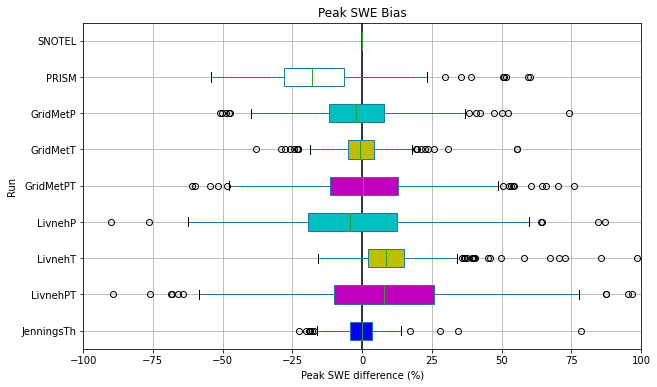

In [35]:
# Peak SWE
# colors = ['w', 'w', 'c', 'y', 'm', 'c', 'y', 'm']
colors = ['b', 'm', 'y', 'c', 'm', 'y', 'c', 'w', 'w']

fig,ax = plt.subplots(figsize=(10,6)) 
plt.axvline(0, color='black')
ax,props = pswe_diff_df.plot.box(patch_artist=True, return_type='both', ax=ax, vert=False)
for patch,color in zip(props['boxes'],colors):
    patch.set_facecolor(color)
plt.grid()
plt.xlim(-100,100)
plt.xlabel('Peak SWE difference (%)')
plt.ylabel('Run')
plt.title('Peak SWE Bias')
# plt.savefig(save_dir+'boxplot_peak_swe_bias', dpi=300)
# plt.show()

### Barplot of Mean Peak SWE

In [37]:
lb_q, ub_q = 0.25, 0.75

In [38]:
pswe_mean_diff_list = list(pswe_diff_df.mean())

In [39]:
pswe_mean_diff_df = pd.DataFrame(pswe_mean_diff_list, 
                                 index = ['JenningsTh', 'LivnehPT', 'LivnehT', 'LivnehP', 'GridMetPT', 'GridMetT', 'GridMetP', 'PRISM', 'SNOTEL'],
                                 columns = ['peak_swe_diff'])

<BarContainer object of 10 artists>

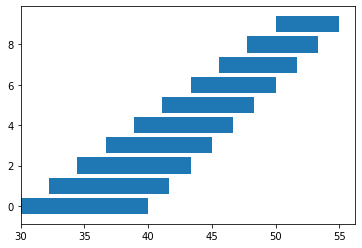

In [77]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10)
y_bot = np.linspace(30, 50, 10)
y_dif = np.linspace(10, 5, 10)

plt.barh(x, y_dif, left=y_bot)

In [40]:
prism_mean_peak_swe_bias = pswe_mean_diff_df['peak_swe_diff']['PRISM']

(-75.0, 75.0)

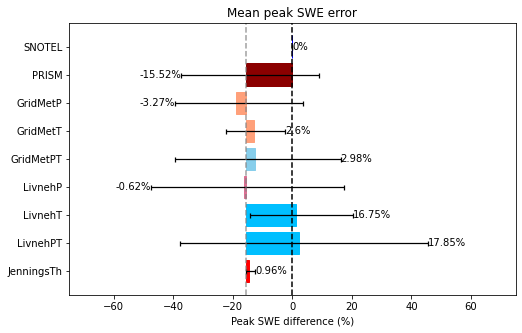

In [40]:
x = pswe_mean_diff_df.index.values
y_bot = [prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, 0, 0]
y_dif = [pswe_mean_diff_df['peak_swe_diff'][i] for i in range(7)] + [prism_mean_peak_swe_bias,0]
# y_bot = [pswe_mean_diff_df['peak_swe_diff'][i] + prism_mean_peak_swe_bias for i in range(7)] + [0,0]
# y_dif = [pswe_mean_diff_df['peak_swe_diff'][i] for i in range(7)] + [prism_mean_peak_swe_bias,0]
# y_bot = [pswe_mean_diff_df['peak_swe_diff'][i] + prism_mean_peak_swe_bias for i in range(7)] + [0,0]
# y_dif = [prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, 0]

lbls = [f'{round(item, 2)}%' for item in y_dif]

# creating error
lb = pd.DataFrame(data={'peak_swe_diff': pswe_diff_df.quantile(lb_q)})
lb_diff = pswe_mean_diff_df - lb
ub = pd.DataFrame(data={'peak_swe_diff': pswe_diff_df.quantile(ub_q)})
ub_diff = ub - pswe_mean_diff_df
xerror = np.vstack((lb_diff['peak_swe_diff'].to_numpy(), ub_diff['peak_swe_diff'].to_numpy()))

plt.figure(figsize=(8,5))
# bars = plt.barh(x, y_dif, height=0.6, left=y_bot)
bars = plt.barh(x, y_dif, xerr=xerror, height=0.8, left=y_bot, ecolor='k', error_kw=dict(lw=1.25, capsize=2.5, capthick=1.25))
# plt.bar_label(bars, fmt='%.2f')
plt.bar_label(bars, labels=lbls)
plt.title('Mean peak SWE error')
plt.xlabel('Peak SWE difference (%)')
# plt.ylabel('Run')
plt.axvline(0, color='k', linestyle='--')
plt.axvline(prism_mean_peak_swe_bias, color='grey', alpha=0.75, linestyle='--')
for color, bar in zip(['red','deepskyblue','deepskyblue','palevioletred','skyblue','lightsalmon','lightsalmon','darkred','blue'], bars.patches):
    bar.set_color(color)
plt.xlim(-75,75)

# plt.savefig(save_dir+'mean_peak_swe_error', dpi=300)
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

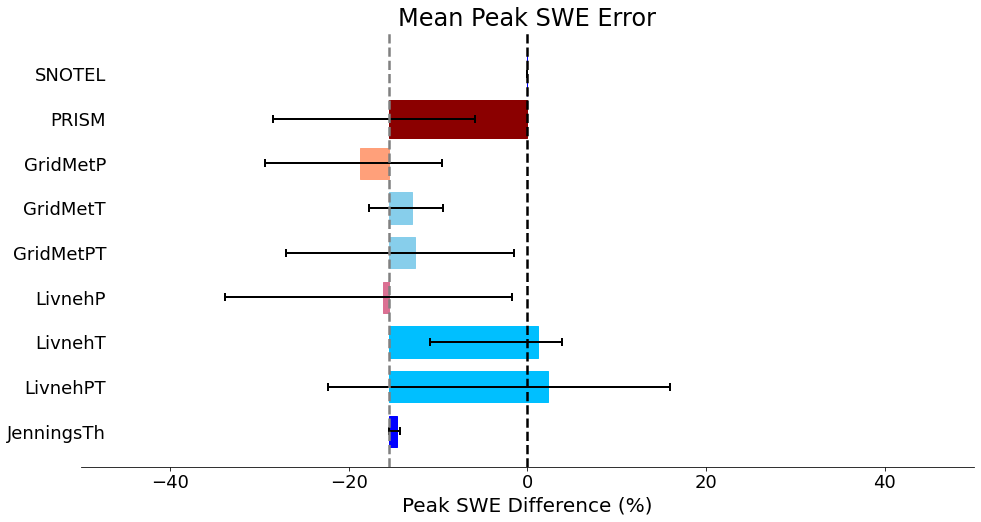

In [39]:
x = pswe_mean_diff_df.index.values
y_bot = [prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, 0, 0]
y_dif = [pswe_mean_diff_df['peak_swe_diff'][i] for i in range(7)] + [prism_mean_peak_swe_bias,0]

lbls = [f'{round(item, 2)}%' for item in y_dif]

# creating error
lb = pd.DataFrame(data={'peak_swe_diff': pswe_diff_df.quantile(lb_q)})
lb_diff = pswe_mean_diff_df - lb
ub = pd.DataFrame(data={'peak_swe_diff': pswe_diff_df.quantile(ub_q)})
ub_diff = ub - pswe_mean_diff_df
xerror = np.vstack((lb_diff['peak_swe_diff'].to_numpy(), ub_diff['peak_swe_diff'].to_numpy()))

# plt.figure(figsize=(8,5))
plt.figure(figsize=(16,8))
# bars = plt.barh(x, y_dif, height=0.6, left=y_bot)
h = [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.85, 1]
hnew = [i for i in h]
bars = plt.barh(x, y_dif, xerr=xerror, height=hnew, left=y_bot, ecolor='k', error_kw=dict(lw=2, capsize=4, capthick=2))
# plt.bar_label(bars, labels=lbls)    # label bars
plt.title('Mean Peak SWE Error', fontsize=24)
plt.xlabel('Peak SWE Difference (%)', fontsize=20)
# plt.ylabel('Run')
plt.axvline(0, color='k', linestyle='--', linewidth=2.5)
plt.axvline(prism_mean_peak_swe_bias, color='grey', alpha=1.0, linestyle='--', linewidth=2.5)
for color, bar in zip(['blue','deepskyblue','deepskyblue','palevioletred','skyblue','skyblue','lightsalmon','darkred','blue'], bars.patches):
    bar.set_color(color)
plt.xlim(-50,50)

# Working with axes
for d in ["left", "top", "right"]:   # set plot spines to invisible
    plt.gca().spines[d].set_visible(False)
plt.tick_params(axis='y', left=False)   # remove tick marks, keep tick labels

# Text size/fonts
# f = [16, 16, 16, 16, 16, 16, 16, 18, 20]
# fnew = [i for i in f]
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# import pylab as plt
# plt.rc('text', usetex=True)
# plt.ylabel(r'\small{Text 1} \Huge{Text2}')

plt.tick_params(axis="y",direction="in", pad=-25)
    
# plt.savefig('/global/cscratch1/sd/yum/swe/conferences/MtnClim/'+'mean_peak_swe_error', dpi=300)
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

### Barplot of Median Peak SWE

In [40]:
pswe_med_diff_list = list(pswe_diff_df.median())

In [41]:
pswe_med_diff_df = pd.DataFrame(pswe_med_diff_list, 
                                 index = ['JenningsTh', 'LivnehPT', 'LivnehT', 'LivnehP', 'GridMetPT', 'GridMetT', 'GridMetP', 'PRISM', 'SNOTEL'],
                                 columns = ['peak_swe_diff'])

In [42]:
prism_med_peak_swe_bias = pswe_med_diff_df['peak_swe_diff']['PRISM']

(-75.0, 75.0)

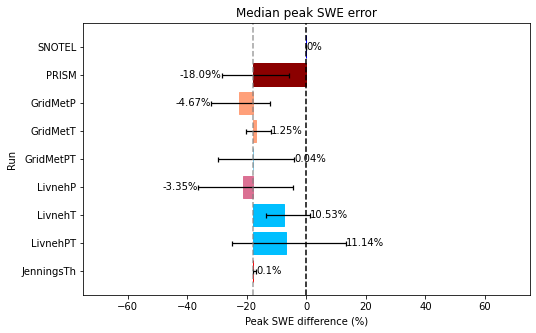

In [66]:
x = pswe_med_diff_df.index.values
y_bot = [prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, 0, 0]
y_dif = [pswe_med_diff_df['peak_swe_diff'][i] for i in range(7)] + [prism_med_peak_swe_bias,0]

lbls = [f'{round(item, 2)}%' for item in y_dif]

# creating error
lb = pd.DataFrame(data={'peak_swe_diff': pswe_diff_df.quantile(lb_q)})
lb_diff = pswe_med_diff_df - lb
ub = pd.DataFrame(data={'peak_swe_diff': pswe_diff_df.quantile(ub_q)})
ub_diff = ub - pswe_med_diff_df
xerror = np.vstack((lb_diff['peak_swe_diff'].to_numpy(), ub_diff['peak_swe_diff'].to_numpy()))

plt.figure(figsize=(8,5))
bars = plt.barh(x, y_dif, xerr=xerror, height=0.8, left=y_bot, ecolor='k', error_kw=dict(lw=1.25, capsize=2.5, capthick=1.25))
# plt.bar_label(bars, fmt='%.2f')
plt.bar_label(bars, labels=lbls)
plt.title('Median peak SWE error')
plt.xlabel('Peak SWE difference (%)')
plt.ylabel('Run')
plt.axvline(0, color='k', linestyle='--')
plt.axvline(prism_med_peak_swe_bias, color='grey', alpha=0.75, linestyle='--')
for color, bar in zip(['red','deepskyblue','deepskyblue','palevioletred','skyblue','lightsalmon','lightsalmon','darkred','blue'], bars.patches):
    bar.set_color(color)
plt.xlim(-75,75)
# plt.savefig(save_dir+'median_peak_swe_error', dpi=300)
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

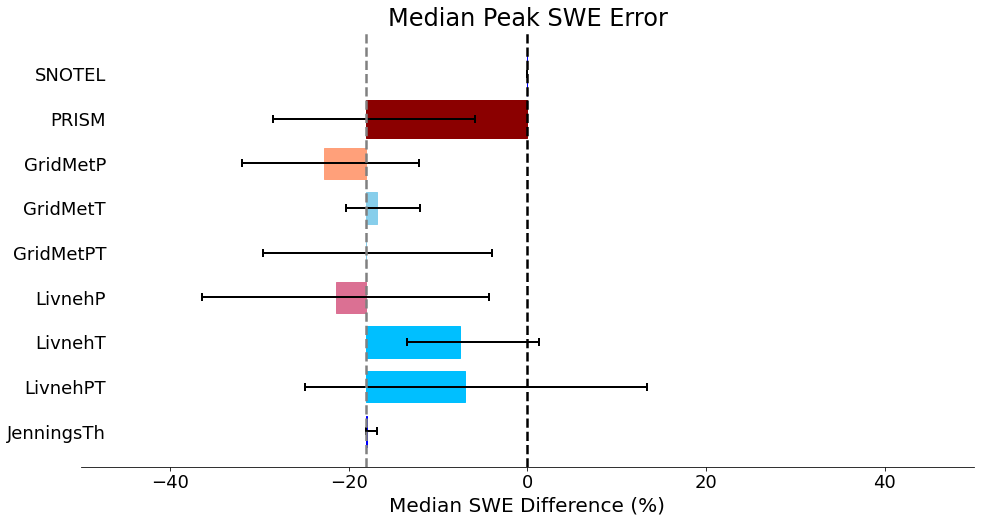

In [49]:
x = pswe_med_diff_df.index.values
y_bot = [prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, 0, 0]
y_dif = [pswe_med_diff_df['peak_swe_diff'][i] for i in range(7)] + [prism_med_peak_swe_bias,0]

lbls = [f'{round(item, 2)}%' for item in y_dif]

# creating error
lb = pd.DataFrame(data={'peak_swe_diff': pswe_diff_df.quantile(lb_q)})
lb_diff = pswe_med_diff_df - lb
ub = pd.DataFrame(data={'peak_swe_diff': pswe_diff_df.quantile(ub_q)})
ub_diff = ub - pswe_med_diff_df
xerror = np.vstack((lb_diff['peak_swe_diff'].to_numpy(), ub_diff['peak_swe_diff'].to_numpy()))

# plt.figure(figsize=(8,5))
plt.figure(figsize=(16,8))
# bars = plt.barh(x, y_dif, height=0.6, left=y_bot)
h = [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.85, 1]
hnew = [i for i in h]
bars = plt.barh(x, y_dif, xerr=xerror, height=hnew, left=y_bot, ecolor='k', error_kw=dict(lw=2, capsize=4, capthick=2))
# plt.bar_label(bars, labels=lbls)    # label bars
plt.title('Median Peak SWE Error', fontsize=24)
plt.xlabel('Median SWE Difference (%)', fontsize=20)
# plt.ylabel('Run')
plt.axvline(0, color='k', linestyle='--', linewidth=2.5)
plt.axvline(prism_med_peak_swe_bias, color='grey', alpha=1.0, linestyle='--', linewidth=2.5)
for color, bar in zip(['blue','deepskyblue','deepskyblue','palevioletred','skyblue','skyblue','lightsalmon','darkred','blue'], bars.patches):
    bar.set_color(color)
plt.xlim(-50,50)

# Working with axes
for d in ["left", "top", "right"]:   # set plot spines to invisible
    plt.gca().spines[d].set_visible(False)
plt.tick_params(axis='y', left=False)   # remove tick marks, keep tick labels

# Text size/fonts
# f = [16, 16, 16, 16, 16, 16, 16, 18, 20]
# fnew = [i for i in f]
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# import pylab as plt
# plt.rc('text', usetex=True)
# plt.ylabel(r'\small{Text 1} \Huge{Text2}')

plt.tick_params(axis="y",direction="in", pad=-25)
    
# plt.savefig('/global/cscratch1/sd/yum/swe/conferences/MtnClim/'+'med_peak_swe_error', dpi=300)
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

# Calculate bias of each peak SWE - 08/19/22

In [11]:
# for each experiment:
#    for each station:
#       get peak SWE (1 april SWE) across years (for each year)
#       calculate difference in peak SWE (compared to SNOTEL baseline)
# boxplot of peak SWE differences 

## Compute peak SWE (for each station and year)

In [12]:
def get_peak_swe(df, column):    # adapted from swe_triange_metrics function in swe_triangle_metrics.ipynb
    if column == 'snotel_swe':
        swe = df['snotel_swe']
    elif column == 'ua_swe':
        swe = df['ua_swe']
    elif column == 'my_scaled_swe':
        swe = df['final_scaled_swe']
    elif column == 'my_krig_scaled_swe':
        swe = df['krig_scaled_swe']
    else:
        raise ValueError('Unexpected column.')    
    
    # SPD (peak swe) date
    spd_date = pd.to_datetime(df['datetime'].loc[swe.idxmax()])   #spd_date_yr = pd.to_datetime(df['datetime'].loc[df['final_scaled_swe'].idxmax()])
    # SPD SWE depth
    spd_depth = swe.loc[swe.idxmax()]   #spd_swe_yr = df['final_scaled_swe'].loc[df['final_scaled_swe'].idxmax()]
    
    return spd_date, spd_depth

In [13]:
def peak_swe_arr(df, column, year, date_run, metric_run):    # adapted from metrics_arr function in swe_triangle_metrics.ipynb
    yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,7,31)) & (pd.to_datetime(df['datetime']) < datetime(year+1,8,1))]
    # yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,10,1)) & (pd.to_datetime(df['datetime']) < datetime(year+1,6,30))]
    peak_swe_date, peak_swe_depth = get_peak_swe(yr_df, column)
    # x_run.extend((0, peak_swe_date))
    # y_run.extend((0, peak_swe_depth))
    date_run.append(peak_swe_date)
    metric_run.append(peak_swe_depth)
    return date_run, metric_run

In [14]:
# initialize lists
site_code = []
year = []
pswe_date_snotel, pswe_snotel = [], []
pswe_date_ua, pswe_ua = [], [] 
pswe_date_pprism_tprism, pswe_pprism_tprism = [], []
pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = [], []
pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = [], []
pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = [], []
pswe_date_plivneh_tprism, pswe_plivneh_tprism = [], []
pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = [], []
pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = [], []
pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = [], []

In [15]:
for idx, row in gm_snotel_sites.iterrows():
    sitecode = row['code']
    print(sitecode)
    # site_lon, site_lat = row['geometry'].x, row['geometry'].y
    
    if os.path.exists(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv') and sitecode != '396_UT_SNTL' and sitecode != '435_UT_SNTL':
        # Load data
        pr_prism_temp_prism_df = pd.read_csv(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_gridmet_temp_prism_df = pd.read_csv(f'{pr_gridmet_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_gridmet_df = pd.read_csv(f'{pr_prism_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_gridmet_temp_gridmet_df = pd.read_csv(f'{pr_gridmet_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_livneh_temp_prism_df = pd.read_csv(f'{pr_livneh_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_livneh_df = pd.read_csv(f'{pr_prism_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_livneh_temp_livneh_df = pd.read_csv(f'{pr_livneh_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_prism_th_jennings_df = pd.read_csv(f'{th_jennings_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        
        for yr in np.unique(pd.to_datetime(pr_prism_temp_prism_df['datetime']).dt.year)[:-1]:
            # print(yr)
            site_code.append(sitecode)
            year.append(yr)
            pswe_date_snotel, pswe_snotel = peak_swe_arr(pr_prism_temp_prism_df, 'snotel_swe', yr, pswe_date_snotel, pswe_snotel)
            pswe_date_ua, pswe_ua = peak_swe_arr(pr_prism_temp_prism_df, 'ua_swe', yr, pswe_date_ua, pswe_ua)
            pswe_date_pprism_tprism, pswe_pprism_tprism = peak_swe_arr(pr_prism_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism, pswe_pprism_tprism)
            pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = peak_swe_arr(pr_gridmet_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tprism, pswe_pgridmet_tprism)
            pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = peak_swe_arr(pr_prism_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pprism_tgridmet, pswe_pprism_tgridmet)
            pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = peak_swe_arr(pr_gridmet_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet)
            pswe_date_plivneh_tprism, pswe_plivneh_tprism = peak_swe_arr(pr_livneh_temp_prism_df, 'my_scaled_swe', yr, pswe_date_plivneh_tprism, pswe_plivneh_tprism)
            pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = peak_swe_arr(pr_prism_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_pprism_tlivneh, pswe_pprism_tlivneh)
            pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = peak_swe_arr(pr_livneh_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh)
            pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = peak_swe_arr(pr_prism_temp_prism_th_jennings_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings)
            

1030_CO_SNTL
305_CO_SNTL
8082_UT_SNTL
317_WY_SNTL
1061_CO_SNTL
1041_CO_SNTL
1143_AZ_SNTL
342_WY_SNTL
345_CO_SNTL
348_UT_SNTL
1185_CO_SNTL
1162_UT_SNTL
353_WY_SNTL
368_UT_SNTL
371_UT_SNTL
1192_UT_SNTL
1153_UT_SNTL
913_CO_SNTL
378_CO_SNTL
380_CO_SNTL
383_UT_SNTL
386_CO_SNTL
387_CO_SNTL
247_CO_SNTL
1101_CO_SNTL
396_UT_SNTL
409_CO_SNTL
904_CO_SNTL
415_CO_SNTL
1236_UT_SNTL
426_CO_SNTL
432_UT_SNTL
435_UT_SNTL
444_UT_SNTL
449_WY_SNTL
452_UT_SNTL
457_CO_SNTL
461_UT_SNTL
1163_UT_SNTL
465_CO_SNTL
467_CO_SNTL
468_WY_SNTL
1252_CO_SNTL
1120_CO_SNTL
1149_UT_SNTL
481_UT_SNTL
1186_CO_SNTL
505_CO_SNTL
248_CO_SNTL
509_WY_SNTL
521_UT_SNTL
522_UT_SNTL
1187_CO_SNTL
528_UT_SNTL
538_CO_SNTL
542_CO_SNTL
543_UT_SNTL
544_WY_SNTL
547_CO_SNTL
970_CO_SNTL
554_WY_SNTL
555_WY_SNTL
556_CO_SNTL
559_UT_SNTL
565_CO_SNTL
566_UT_SNTL
1116_UT_SNTL
513_UT_SNTL
572_UT_SNTL
1215_UT_SNTL
261_UT_SNTL
1047_WY_SNTL
586_CO_SNTL
589_CO_SNTL
1261_UT_SNTL
597_WY_SNTL
940_CO_SNTL
607_CO_SNTL
905_CO_SNTL
618_CO_SNTL
1040_CO_SNTL
622_CO

## Compute Biases/Differences

In [16]:
# UA difference
ua_bias = (np.array(pswe_ua) / np.array(pswe_snotel)) - 1

### Level 1

In [17]:
snotel_bias = (np.array(pswe_snotel) / np.array(pswe_snotel)) - 1

### Level 2

In [18]:
prism_bias = (np.array(pswe_pprism_tprism) / np.array(pswe_snotel)) - 1

### Level 3

#### 3ai

##### Gridmet

In [19]:
# (pswe_pgridmet_tprism_smean / pswe_snotel_smean) - 1

In [20]:
pgridmet_bias = ((np.array(pswe_pgridmet_tprism) / np.array(pswe_pprism_tprism)) - 1)

##### Livneh

In [21]:
# (pswe_plivneh_tprism_smean / pswe_snotel_smean) - 1

In [22]:
plivneh_bias = ((np.array(pswe_plivneh_tprism) / np.array(pswe_pprism_tprism)) - 1)

#### 3aii

##### Gridmet

In [23]:
# (pswe_pprism_tgridmet_smean / pswe_snotel_smean) - 1

In [24]:
tgridmet_bias = ((np.array(pswe_pprism_tgridmet) / np.array(pswe_pprism_tprism)) - 1)

##### Livneh

In [25]:
# (pswe_pprism_tlivneh_smean / pswe_snotel_smean) - 1

In [26]:
tlivneh_bias = ((np.array(pswe_pprism_tlivneh) / np.array(pswe_pprism_tprism)) - 1)

#### 3aiii

##### Gridmet

In [27]:
# (pswe_pgridmet_tgridmet_smean / pswe_snotel_smean) - 1

In [28]:
ptgridmet_bias = ((np.array(pswe_pgridmet_tgridmet) / np.array(pswe_pprism_tprism)) - 1)

##### Livneh

In [29]:
# (pswe_plivneh_tlivneh_smean / pswe_snotel_smean) - 1

In [30]:
ptlivneh_bias = ((np.array(pswe_plivneh_tlivneh) / np.array(pswe_pprism_tprism)) - 1)

#### 3b

In [31]:
# (pswe_pprism_tprism_thjennings_smean / pswe_snotel_smean) - 1

In [32]:
thjennings_bias = ((np.array(pswe_pprism_tprism_thjennings) / np.array(pswe_pprism_tprism)) - 1)

## Plots

In [33]:
pswe_diff_df = pd.DataFrame(list(zip(snotel_bias, prism_bias, pgridmet_bias, tgridmet_bias, ptgridmet_bias, plivneh_bias, tlivneh_bias, ptlivneh_bias, thjennings_bias)), 
                                 columns = ['SNOTEL', 'PRISM', 'GridMetP', 'GridMetT', 'GridMetPT', 'LivnehP', 'LivnehT', 'LivnehPT', 'JenningsTh'])

In [34]:
# convert to %
pswe_diff_df = pswe_diff_df*100

In [35]:
# flip order of runs (i.e. columns)
pswe_diff_df = pswe_diff_df.iloc[:, ::-1]

### Boxplot of all peak SWE differences

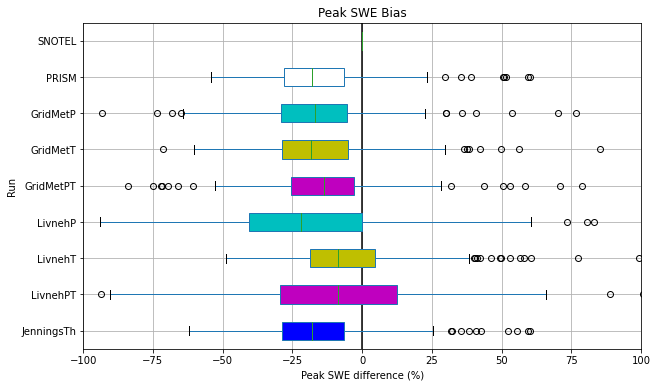

In [35]:
# colors = ['w', 'w', 'c', 'y', 'm', 'c', 'y', 'm']
colors = ['b', 'm', 'y', 'c', 'm', 'y', 'c', 'w', 'w']

fig,ax = plt.subplots(figsize=(10,6)) 
plt.axvline(0, color='black')
ax,props = pswe_diff_df.plot.box(patch_artist=True, return_type='both', ax=ax, vert=False)
for patch,color in zip(props['boxes'],colors):
    patch.set_facecolor(color)
plt.grid()
plt.xlim(-100,100)
plt.xlabel('Peak SWE difference (%)')
plt.ylabel('Run')
plt.title('Peak SWE Bias')
# plt.savefig(save_dir+'boxplot_peak_swe_bias', dpi=300)
# plt.show()

### Barplot of Mean Peak SWE

In [36]:
pswe_mean_diff_list = list(pswe_diff_df.mean())

In [37]:
pswe_mean_diff_df = pd.DataFrame(pswe_mean_diff_list, 
                                 index = ['JenningsTh', 'LivnehPT', 'LivnehT', 'LivnehP', 'GridMetPT', 'GridMetT', 'GridMetP', 'PRISM', 'SNOTEL'],
                                 columns = ['peak_swe_diff'])

<BarContainer object of 10 artists>

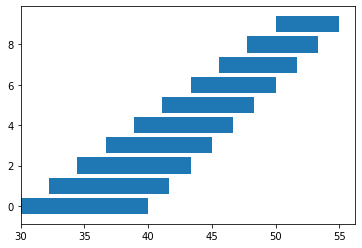

In [95]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10)
y_bot = np.linspace(30, 50, 10)
y_dif = np.linspace(10, 5, 10)

plt.barh(x, y_dif, left=y_bot)

In [156]:
prism_mean_peak_swe_bias = pswe_mean_diff_df['peak_swe_diff']['PRISM']

In [157]:
prism_mean_peak_swe_bias

-15.647590321765668

(-100.0, 100.0)

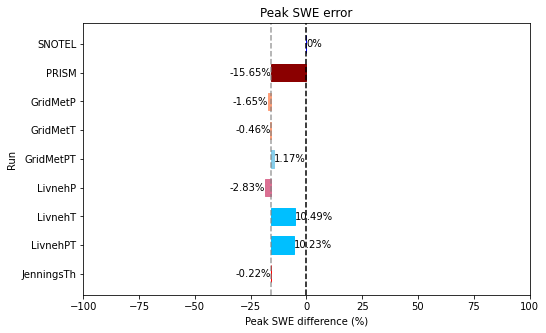

In [168]:
x = pswe_mean_diff_df.index.values
y_bot = [prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, prism_mean_peak_swe_bias, 0, 0]
y_dif = [pswe_mean_diff_df['peak_swe_diff'][i] for i in range(7)] + [prism_mean_peak_swe_bias,0]   

lbls = [f'{round(item, 2)}%' for item in y_dif]

plt.figure(figsize=(8,5))
bars = plt.barh(x, width=y_dif, height=0.6, left=y_bot)
# plt.bar_label(bars, fmt='%.2f')
plt.bar_label(bars, labels=lbls)
plt.title('Peak SWE error')
plt.xlabel('Peak SWE difference (%)')
plt.ylabel('Run')
plt.axvline(0, color='k', linestyle='--')
plt.axvline(prism_mean_peak_swe_bias, color='grey', alpha=0.75, linestyle='--')
for color, bar in zip(['red','deepskyblue','deepskyblue','palevioletred','skyblue','lightsalmon','lightsalmon','darkred','blue'], bars.patches):
    bar.set_color(color)
plt.xlim(-100,100)
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

### Barplot of Median Peak SWE

In [161]:
pswe_med_diff_list = list(pswe_diff_df.median())

In [162]:
pswe_med_diff_df = pd.DataFrame(pswe_med_diff_list, 
                                 index = ['JenningsTh', 'LivnehPT', 'LivnehT', 'LivnehP', 'GridMetPT', 'GridMetT', 'GridMetP', 'PRISM', 'SNOTEL'],
                                 columns = ['peak_swe_diff'])

In [163]:
prism_med_peak_swe_bias = pswe_med_diff_df['peak_swe_diff']['PRISM']

(-100.0, 100.0)

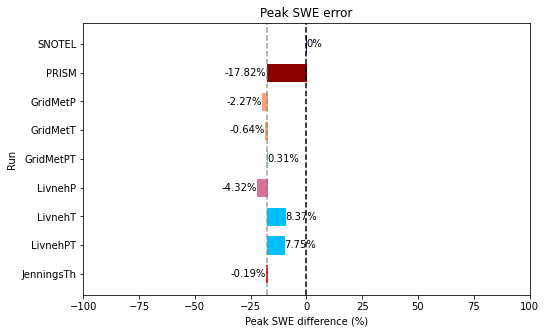

In [169]:
x = pswe_med_diff_df.index.values
y_bot = [prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, prism_med_peak_swe_bias, 0, 0]
y_dif = [pswe_med_diff_df['peak_swe_diff'][i] for i in range(7)] + [prism_med_peak_swe_bias,0]

lbls = [f'{round(item, 2)}%' for item in y_dif]

plt.figure(figsize=(8,5))
bars = plt.barh(x, y_dif, height=0.6, left=y_bot)
# plt.bar_label(bars, fmt='%.2f')
plt.bar_label(bars, labels=lbls)
plt.title('Peak SWE error')
plt.xlabel('Peak SWE difference (%)')
plt.ylabel('Run')
plt.axvline(0, color='k', linestyle='--')
plt.axvline(prism_med_peak_swe_bias, color='grey', alpha=0.75, linestyle='--')
for color, bar in zip(['red','deepskyblue','deepskyblue','palevioletred','skyblue','lightsalmon','lightsalmon','darkred','blue'], bars.patches):
    bar.set_color(color)
plt.xlim(-100,100)
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

# Calculate bias of each peak SWE and then average biases - 07/29/22 Brainstorm #2

In [11]:
# for each experiment:
#    for each station:
#       get peak SWE (1 april SWE) across years (for each year)
#       calculate difference in peak SWE (compared to SNOTEL baseline)
# boxplot of peak SWE differences 

## Compute peak SWE (for each station and year)

In [12]:
def get_peak_swe(df, column):    # adapted from swe_triange_metrics function in swe_triangle_metrics.ipynb
    if column == 'snotel_swe':
        swe = df['snotel_swe']
    elif column == 'ua_swe':
        swe = df['ua_swe']
    elif column == 'my_scaled_swe':
        swe = df['final_scaled_swe']
    elif column == 'my_krig_scaled_swe':
        swe = df['krig_scaled_swe']
    else:
        raise ValueError('Unexpected column.')    
    
    # SPD (peak swe) date
    spd_date = pd.to_datetime(df['datetime'].loc[swe.idxmax()])   #spd_date_yr = pd.to_datetime(df['datetime'].loc[df['final_scaled_swe'].idxmax()])
    # SPD SWE depth
    spd_depth = swe.loc[swe.idxmax()]   #spd_swe_yr = df['final_scaled_swe'].loc[df['final_scaled_swe'].idxmax()]
    
    return spd_date, spd_depth

In [13]:
def peak_swe_arr(df, column, year, date_run, metric_run):    # adapted from metrics_arr function in swe_triangle_metrics.ipynb
    yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,7,31)) & (pd.to_datetime(df['datetime']) < datetime(year+1,8,1))]
    # yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,10,1)) & (pd.to_datetime(df['datetime']) < datetime(year+1,6,30))]
    peak_swe_date, peak_swe_depth = get_peak_swe(yr_df, column)
    # x_run.extend((0, peak_swe_date))
    # y_run.extend((0, peak_swe_depth))
    date_run.append(peak_swe_date)
    metric_run.append(peak_swe_depth)
    return date_run, metric_run

In [14]:
# initialize lists
site_code = []
year = []
pswe_date_snotel, pswe_snotel = [], []
pswe_date_ua, pswe_ua = [], [] 
pswe_date_pprism_tprism, pswe_pprism_tprism = [], []
pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = [], []
pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = [], []
pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = [], []
pswe_date_plivneh_tprism, pswe_plivneh_tprism = [], []
pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = [], []
pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = [], []
pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = [], []

In [15]:
for idx, row in gm_snotel_sites.iterrows():
    sitecode = row['code']
    print(sitecode)
    # site_lon, site_lat = row['geometry'].x, row['geometry'].y
    
    if os.path.exists(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv') and sitecode != '396_UT_SNTL' and sitecode != '435_UT_SNTL':
        # Load data
        pr_prism_temp_prism_df = pd.read_csv(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_gridmet_temp_prism_df = pd.read_csv(f'{pr_gridmet_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_gridmet_df = pd.read_csv(f'{pr_prism_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_gridmet_temp_gridmet_df = pd.read_csv(f'{pr_gridmet_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_livneh_temp_prism_df = pd.read_csv(f'{pr_livneh_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_livneh_df = pd.read_csv(f'{pr_prism_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_livneh_temp_livneh_df = pd.read_csv(f'{pr_livneh_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_prism_th_jennings_df = pd.read_csv(f'{th_jennings_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        
        for yr in np.unique(pd.to_datetime(pr_prism_temp_prism_df['datetime']).dt.year)[:-1]:
            # print(yr)
            site_code.append(sitecode)
            year.append(yr)
            pswe_date_snotel, pswe_snotel = peak_swe_arr(pr_prism_temp_prism_df, 'snotel_swe', yr, pswe_date_snotel, pswe_snotel)
            pswe_date_ua, pswe_ua = peak_swe_arr(pr_prism_temp_prism_df, 'ua_swe', yr, pswe_date_ua, pswe_ua)
            pswe_date_pprism_tprism, pswe_pprism_tprism = peak_swe_arr(pr_prism_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism, pswe_pprism_tprism)
            pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = peak_swe_arr(pr_gridmet_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tprism, pswe_pgridmet_tprism)
            pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = peak_swe_arr(pr_prism_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pprism_tgridmet, pswe_pprism_tgridmet)
            pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = peak_swe_arr(pr_gridmet_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet)
            pswe_date_plivneh_tprism, pswe_plivneh_tprism = peak_swe_arr(pr_livneh_temp_prism_df, 'my_scaled_swe', yr, pswe_date_plivneh_tprism, pswe_plivneh_tprism)
            pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = peak_swe_arr(pr_prism_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_pprism_tlivneh, pswe_pprism_tlivneh)
            pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = peak_swe_arr(pr_livneh_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh)
            pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = peak_swe_arr(pr_prism_temp_prism_th_jennings_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings)
            

1030_CO_SNTL
305_CO_SNTL
8082_UT_SNTL
317_WY_SNTL
1061_CO_SNTL
1041_CO_SNTL
1143_AZ_SNTL
342_WY_SNTL
345_CO_SNTL
348_UT_SNTL
1185_CO_SNTL
1162_UT_SNTL
353_WY_SNTL
368_UT_SNTL
371_UT_SNTL
1192_UT_SNTL
1153_UT_SNTL
913_CO_SNTL
378_CO_SNTL
380_CO_SNTL
383_UT_SNTL
386_CO_SNTL
387_CO_SNTL
247_CO_SNTL
1101_CO_SNTL
396_UT_SNTL
409_CO_SNTL
904_CO_SNTL
415_CO_SNTL
1236_UT_SNTL
426_CO_SNTL
432_UT_SNTL
435_UT_SNTL
444_UT_SNTL
449_WY_SNTL
452_UT_SNTL
457_CO_SNTL
461_UT_SNTL
1163_UT_SNTL
465_CO_SNTL
467_CO_SNTL
468_WY_SNTL
1252_CO_SNTL
1120_CO_SNTL
1149_UT_SNTL
481_UT_SNTL
1186_CO_SNTL
505_CO_SNTL
248_CO_SNTL
509_WY_SNTL
521_UT_SNTL
522_UT_SNTL
1187_CO_SNTL
528_UT_SNTL
538_CO_SNTL
542_CO_SNTL
543_UT_SNTL
544_WY_SNTL
547_CO_SNTL
970_CO_SNTL
554_WY_SNTL
555_WY_SNTL
556_CO_SNTL
559_UT_SNTL
565_CO_SNTL
566_UT_SNTL
1116_UT_SNTL
513_UT_SNTL
572_UT_SNTL
1215_UT_SNTL
261_UT_SNTL
1047_WY_SNTL
586_CO_SNTL
589_CO_SNTL
1261_UT_SNTL
597_WY_SNTL
940_CO_SNTL
607_CO_SNTL
905_CO_SNTL
618_CO_SNTL
1040_CO_SNTL
622_CO

## Compute Biases/Differences

In [16]:
# UA difference
ua_bias = (np.array(pswe_ua) / np.array(pswe_snotel)) - 1

### Level 1

In [17]:
snotel_bias = (np.array(pswe_snotel) / np.array(pswe_snotel)) - 1

### Level 2

In [18]:
prism_bias = (np.array(pswe_pprism_tprism) / np.array(pswe_snotel)) - 1

### Level 3

#### 3ai

##### Gridmet

In [19]:
# (pswe_pgridmet_tprism_smean / pswe_snotel_smean) - 1

In [20]:
pgridmet_bias = ((np.array(pswe_pgridmet_tprism) / np.array(pswe_pprism_tprism)) - 1) + ((np.array(pswe_pprism_tprism) / np.array(pswe_snotel)) - 1)

##### Livneh

In [21]:
# (pswe_plivneh_tprism_smean / pswe_snotel_smean) - 1

In [22]:
plivneh_bias = ((np.array(pswe_plivneh_tprism) / np.array(pswe_pprism_tprism)) - 1) + ((np.array(pswe_pprism_tprism) / np.array(pswe_snotel)) - 1)

#### 3aii

##### Gridmet

In [23]:
# (pswe_pprism_tgridmet_smean / pswe_snotel_smean) - 1

In [24]:
tgridmet_bias = ((np.array(pswe_pprism_tgridmet) / np.array(pswe_pprism_tprism)) - 1) + ((np.array(pswe_pprism_tprism) / np.array(pswe_snotel)) - 1)

##### Livneh

In [25]:
# (pswe_pprism_tlivneh_smean / pswe_snotel_smean) - 1

In [26]:
tlivneh_bias = ((np.array(pswe_pprism_tlivneh) / np.array(pswe_pprism_tprism)) - 1) + ((np.array(pswe_pprism_tprism) / np.array(pswe_snotel)) - 1)

#### 3aiii

##### Gridmet

In [27]:
# (pswe_pgridmet_tgridmet_smean / pswe_snotel_smean) - 1

In [28]:
ptgridmet_bias = ((np.array(pswe_pgridmet_tgridmet) / np.array(pswe_pprism_tprism)) - 1) + ((np.array(pswe_pprism_tprism) / np.array(pswe_snotel)) - 1)

##### Livneh

In [29]:
# (pswe_plivneh_tlivneh_smean / pswe_snotel_smean) - 1

In [30]:
ptlivneh_bias = ((np.array(pswe_plivneh_tlivneh) / np.array(pswe_pprism_tprism)) - 1) + ((np.array(pswe_pprism_tprism) / np.array(pswe_snotel)) - 1)

#### 3b

In [31]:
# (pswe_pprism_tprism_thjennings_smean / pswe_snotel_smean) - 1

In [32]:
thjennings_bias = ((np.array(pswe_pprism_tprism_thjennings) / np.array(pswe_pprism_tprism)) - 1) + ((np.array(pswe_pprism_tprism) / np.array(pswe_snotel)) - 1)

## Plots

### Boxplot of all peak SWE differences

In [32]:
pswe_diff_df = pd.DataFrame(list(zip(snotel_bias, prism_bias, pgridmet_bias, tgridmet_bias, ptgridmet_bias, plivneh_bias, tlivneh_bias, ptlivneh_bias, thjennings_bias)), 
                                 columns = ['SNOTEL', 'PRISM', 'GridMetP', 'GridMetT', 'GridMetPT', 'LivnehP', 'LivnehT', 'LivnehPT', 'JenningsTh'])

In [33]:
# convert to %
pswe_diff_df = pswe_diff_df*100

In [34]:
# flip order of runs (i.e. columns)
pswe_diff_df = pswe_diff_df.iloc[:, ::-1]

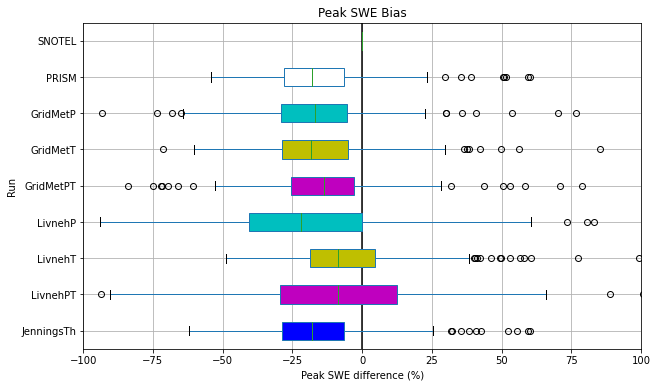

In [35]:
# colors = ['w', 'w', 'c', 'y', 'm', 'c', 'y', 'm']
colors = ['b', 'm', 'y', 'c', 'm', 'y', 'c', 'w', 'w']

fig,ax = plt.subplots(figsize=(10,6)) 
plt.axvline(0, color='black')
ax,props = pswe_diff_df.plot.box(patch_artist=True, return_type='both', ax=ax, vert=False)
for patch,color in zip(props['boxes'],colors):
    patch.set_facecolor(color)
plt.grid()
plt.xlim(-100,100)
plt.xlabel('Peak SWE difference (%)')
plt.ylabel('Run')
plt.title('Peak SWE Bias')
plt.savefig(save_dir+'boxplot_peak_swe_bias', dpi=300)
# plt.show()

### Barplot of Mean Peak SWE

In [36]:
pswe_mean_diff_list = list(pswe_diff_df.mean())

In [37]:
pswe_mean_diff_df = pd.DataFrame(pswe_mean_diff_list, 
                                 index = ['JenningsTh', 'LivnehPT', 'LivnehT', 'LivnehP', 'GridMetPT', 'GridMetT', 'GridMetP', 'PRISM', 'SNOTEL'],
                                 columns = ['peak_swe_diff'])

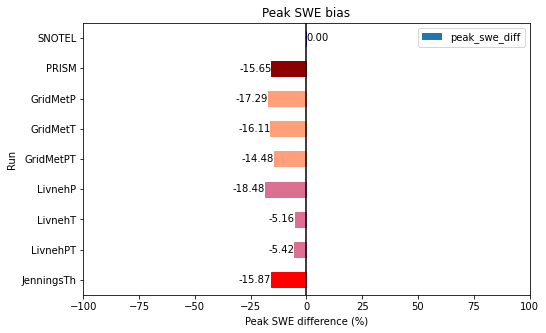

In [38]:
ax = pswe_mean_diff_df.plot(kind='barh', figsize=(8,5))
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_xlim(-100,100)
ax.axvline(0, color='black')
ax.set_title('Peak SWE bias')
ax.set_xlabel('Peak SWE difference (%)')
ax.set_ylabel('Run')
for color, bar in zip(['red','palevioletred','palevioletred','palevioletred','lightsalmon','lightsalmon','lightsalmon','darkred','blue'], ax.patches):
    bar.set_color(color)
plt.savefig(save_dir+'barplot_mean_peak_swe_bias.png', dpi=300)

# Calculate bias of each peak SWE and then average biases - 07/29/22 Brainstorm #1

In [ ]:
# for each experiment:
#    for each station:
#       get peak SWE (1 april SWE) across years (for each year)
#       calculate difference in peak SWE (compared to SNOTEL baseline)
# boxplot of peak SWE differences 

## Compute peak SWE (for each station and year)

In [11]:
def get_peak_swe(df, column):    # adapted from swe_triange_metrics function in swe_triangle_metrics.ipynb
    if column == 'snotel_swe':
        swe = df['snotel_swe']
    elif column == 'ua_swe':
        swe = df['ua_swe']
    elif column == 'my_scaled_swe':
        swe = df['final_scaled_swe']
    elif column == 'my_krig_scaled_swe':
        swe = df['krig_scaled_swe']
    else:
        raise ValueError('Unexpected column.')    
    
    # SPD (peak swe) date
    spd_date = pd.to_datetime(df['datetime'].loc[swe.idxmax()])   #spd_date_yr = pd.to_datetime(df['datetime'].loc[df['final_scaled_swe'].idxmax()])
    # SPD SWE depth
    spd_depth = swe.loc[swe.idxmax()]   #spd_swe_yr = df['final_scaled_swe'].loc[df['final_scaled_swe'].idxmax()]
    
    return spd_date, spd_depth

In [12]:
def peak_swe_arr(df, column, year, date_run, metric_run):    # adapted from metrics_arr function in swe_triangle_metrics.ipynb
    yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,7,31)) & (pd.to_datetime(df['datetime']) < datetime(year+1,8,1))]
    # yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,10,1)) & (pd.to_datetime(df['datetime']) < datetime(year+1,6,30))]
    peak_swe_date, peak_swe_depth = get_peak_swe(yr_df, column)
    # x_run.extend((0, peak_swe_date))
    # y_run.extend((0, peak_swe_depth))
    date_run.append(peak_swe_date)
    metric_run.append(peak_swe_depth)
    return date_run, metric_run

In [13]:
# initialize lists
site_code = []
year = []
pswe_date_snotel, pswe_snotel = [], []
pswe_date_ua, pswe_ua = [], [] 
pswe_date_pprism_tprism, pswe_pprism_tprism = [], []
pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = [], []
pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = [], []
pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = [], []
pswe_date_plivneh_tprism, pswe_plivneh_tprism = [], []
pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = [], []
pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = [], []
pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = [], []

In [14]:
for idx, row in gm_snotel_sites.iterrows():
    sitecode = row['code']
    print(sitecode)
    # site_lon, site_lat = row['geometry'].x, row['geometry'].y
    
    if os.path.exists(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv') and sitecode != '396_UT_SNTL' and sitecode != '435_UT_SNTL':
        # Load data
        pr_prism_temp_prism_df = pd.read_csv(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_gridmet_temp_prism_df = pd.read_csv(f'{pr_gridmet_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_gridmet_df = pd.read_csv(f'{pr_prism_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_gridmet_temp_gridmet_df = pd.read_csv(f'{pr_gridmet_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_livneh_temp_prism_df = pd.read_csv(f'{pr_livneh_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_livneh_df = pd.read_csv(f'{pr_prism_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_livneh_temp_livneh_df = pd.read_csv(f'{pr_livneh_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_prism_th_jennings_df = pd.read_csv(f'{th_jennings_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        
        for yr in np.unique(pd.to_datetime(pr_prism_temp_prism_df['datetime']).dt.year)[:-1]:
            # print(yr)
            site_code.append(sitecode)
            year.append(yr)
            pswe_date_snotel, pswe_snotel = peak_swe_arr(pr_prism_temp_prism_df, 'snotel_swe', yr, pswe_date_snotel, pswe_snotel)
            pswe_date_ua, pswe_ua = peak_swe_arr(pr_prism_temp_prism_df, 'ua_swe', yr, pswe_date_ua, pswe_ua)
            pswe_date_pprism_tprism, pswe_pprism_tprism = peak_swe_arr(pr_prism_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism, pswe_pprism_tprism)
            pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = peak_swe_arr(pr_gridmet_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tprism, pswe_pgridmet_tprism)
            pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = peak_swe_arr(pr_prism_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pprism_tgridmet, pswe_pprism_tgridmet)
            pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = peak_swe_arr(pr_gridmet_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet)
            pswe_date_plivneh_tprism, pswe_plivneh_tprism = peak_swe_arr(pr_livneh_temp_prism_df, 'my_scaled_swe', yr, pswe_date_plivneh_tprism, pswe_plivneh_tprism)
            pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = peak_swe_arr(pr_prism_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_pprism_tlivneh, pswe_pprism_tlivneh)
            pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = peak_swe_arr(pr_livneh_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh)
            pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = peak_swe_arr(pr_prism_temp_prism_th_jennings_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings)
            

1030_CO_SNTL
305_CO_SNTL
8082_UT_SNTL
317_WY_SNTL
1061_CO_SNTL
1041_CO_SNTL
1143_AZ_SNTL
342_WY_SNTL
345_CO_SNTL
348_UT_SNTL
1185_CO_SNTL
1162_UT_SNTL
353_WY_SNTL
368_UT_SNTL
371_UT_SNTL
1192_UT_SNTL
1153_UT_SNTL
913_CO_SNTL
378_CO_SNTL
380_CO_SNTL
383_UT_SNTL
386_CO_SNTL
387_CO_SNTL
247_CO_SNTL
1101_CO_SNTL
396_UT_SNTL
409_CO_SNTL
904_CO_SNTL
415_CO_SNTL
1236_UT_SNTL
426_CO_SNTL
432_UT_SNTL
435_UT_SNTL
444_UT_SNTL
449_WY_SNTL
452_UT_SNTL
457_CO_SNTL
461_UT_SNTL
1163_UT_SNTL
465_CO_SNTL
467_CO_SNTL
468_WY_SNTL
1252_CO_SNTL
1120_CO_SNTL
1149_UT_SNTL
481_UT_SNTL
1186_CO_SNTL
505_CO_SNTL
248_CO_SNTL
509_WY_SNTL
521_UT_SNTL
522_UT_SNTL
1187_CO_SNTL
528_UT_SNTL
538_CO_SNTL
542_CO_SNTL
543_UT_SNTL
544_WY_SNTL
547_CO_SNTL
970_CO_SNTL
554_WY_SNTL
555_WY_SNTL
556_CO_SNTL
559_UT_SNTL
565_CO_SNTL
566_UT_SNTL
1116_UT_SNTL
513_UT_SNTL
572_UT_SNTL
1215_UT_SNTL
261_UT_SNTL
1047_WY_SNTL
586_CO_SNTL
589_CO_SNTL
1261_UT_SNTL
597_WY_SNTL
940_CO_SNTL
607_CO_SNTL
905_CO_SNTL
618_CO_SNTL
1040_CO_SNTL
622_CO

## Compute Biases/Differences

In [15]:
# UA difference
ua_bias = (np.array(pswe_ua) / np.array(pswe_snotel)) - 1

### Layer 1

In [16]:
snotel_bias = (np.array(pswe_snotel) / np.array(pswe_snotel)) - 1

### Layer 2

In [17]:
prism_bias = (np.array(pswe_pprism_tprism) / np.array(pswe_snotel)) - 1

### Layer 3

#### 3ai

##### Gridmet

In [18]:
# (pswe_pgridmet_tprism_smean / pswe_snotel_smean) - 1

In [19]:
pgridmet_bias = ((np.array(pswe_pgridmet_tprism) / np.array(pswe_snotel)) - 1)

##### Livneh

In [20]:
# (pswe_plivneh_tprism_smean / pswe_snotel_smean) - 1

In [21]:
plivneh_bias = ((np.array(pswe_plivneh_tprism) / np.array(pswe_snotel)) - 1)

#### 3aii

##### Gridmet

In [22]:
# (pswe_pprism_tgridmet_smean / pswe_snotel_smean) - 1

In [23]:
tgridmet_bias = ((np.array(pswe_pprism_tgridmet) / np.array(pswe_snotel)) - 1)

##### Livneh

In [24]:
# (pswe_pprism_tlivneh_smean / pswe_snotel_smean) - 1

In [25]:
tlivneh_bias = ((np.array(pswe_pprism_tlivneh) / np.array(pswe_snotel)) - 1)

#### 3aiii

##### Gridmet

In [26]:
# (pswe_pgridmet_tgridmet_smean / pswe_snotel_smean) - 1

In [27]:
ptgridmet_bias = ((np.array(pswe_pgridmet_tgridmet) / np.array(pswe_snotel)) - 1)

##### Livneh

In [28]:
# (pswe_plivneh_tlivneh_smean / pswe_snotel_smean) - 1

In [29]:
ptlivneh_bias = ((np.array(pswe_plivneh_tlivneh) / np.array(pswe_snotel)) - 1)

#### 3b

In [30]:
# (pswe_pprism_tprism_thjennings_smean / pswe_snotel_smean) - 1

In [31]:
thjennings_bias = ((np.array(pswe_pprism_tprism_thjennings) / np.array(pswe_snotel)) - 1)

## Plots

### Boxplot of all peak SWE differences

In [32]:
pswe_diff_df = pd.DataFrame(list(zip(snotel_bias, prism_bias, pgridmet_bias, tgridmet_bias, ptgridmet_bias, plivneh_bias, tlivneh_bias, ptlivneh_bias, thjennings_bias)), 
                                 columns = ['SNOTEL', 'PRISM', 'GridMetP', 'GridMetT', 'GridMetPT', 'LivnehP', 'LivnehT', 'LivnehPT', 'JenningsTh'])

In [33]:
# convert to %
pswe_diff_df = pswe_diff_df*100

In [34]:
# flip order of runs (i.e. columns)
pswe_diff_df = pswe_diff_df.iloc[:, ::-1]

Text(0.5, 1.0, 'Peak SWE Bias')

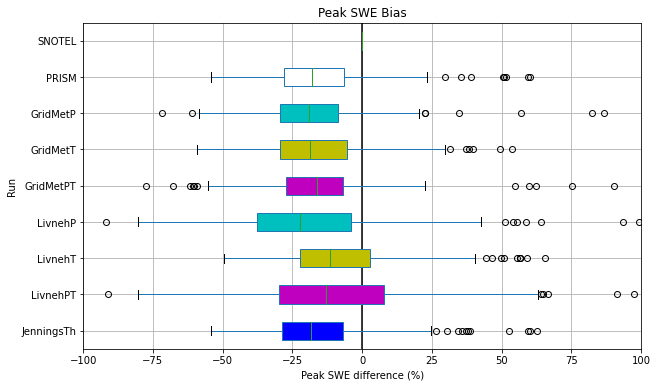

In [40]:
# colors = ['w', 'w', 'c', 'y', 'm', 'c', 'y', 'm']
colors = ['b', 'm', 'y', 'c', 'm', 'y', 'c', 'w', 'w']

fig,ax = plt.subplots(figsize=(10,6)) 
plt.axvline(0, color='black')
ax,props = pswe_diff_df.plot.box(patch_artist=True, return_type='both', ax=ax, vert=False)
for patch,color in zip(props['boxes'],colors):
    patch.set_facecolor(color)
plt.grid()
plt.xlim(-100,100)
plt.xlabel('Peak SWE difference (%)')
plt.ylabel('Run')
plt.title('Peak SWE Bias')
# plt.savefig(save_dir+'boxplot_peak_swe', dpi=300)
# plt.show()

### Barplot of Mean Peak SWE

In [36]:
pswe_mean_diff_list = list(pswe_diff_df.mean())

In [37]:
pswe_mean_diff_df = pd.DataFrame(pswe_mean_diff_list, 
                                 index = ['JenningsTh', 'LivnehPT', 'LivnehT', 'LivnehP', 'GridMetPT', 'GridMetT', 'GridMetP', 'PRISM', 'SNOTEL'],
                                 columns = ['peak_swe_diff'])

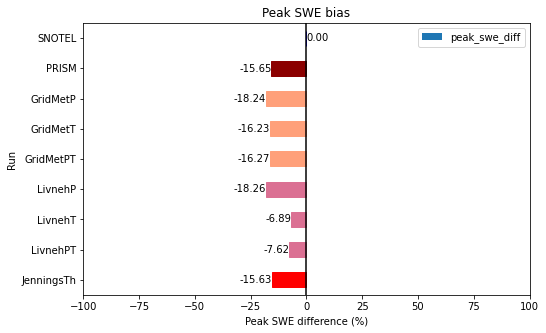

In [38]:
ax = pswe_mean_diff_df.plot(kind='barh', figsize=(8,5))
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_xlim(-100,100)
ax.axvline(0, color='black')
ax.set_title('Peak SWE bias')
ax.set_xlabel('Peak SWE difference (%)')
ax.set_ylabel('Run')
for color, bar in zip(['red','palevioletred','palevioletred','palevioletred','lightsalmon','lightsalmon','lightsalmon','darkred','blue'], ax.patches):
    bar.set_color(color)
# plt.savefig(save_dir+'peak_swe_bias.png', dpi=300)

# Average peak SWE then calculate bias

In [ ]:
# for each experiment:
#    for each station:
#       get peak SWE (1 april SWE) across years (for each year)
#       average peak SWE across years
#    average peak SWE across stations
#    calculate difference (compared to SNOTEL baseline)

## Compute peak SWE means (across years and stations)

In [11]:
def get_peak_swe(df, column):    # adapted from swe_triange_metrics function in swe_triangle_metrics.ipynb
    if column == 'snotel_swe':
        swe = df['snotel_swe']
    elif column == 'ua_swe':
        swe = df['ua_swe']
    elif column == 'my_scaled_swe':
        swe = df['final_scaled_swe']
    elif column == 'my_krig_scaled_swe':
        swe = df['krig_scaled_swe']
    else:
        raise ValueError('Unexpected column.')    
    
    # SPD (peak swe) date
    spd_date = pd.to_datetime(df['datetime'].loc[swe.idxmax()])   #spd_date_yr = pd.to_datetime(df['datetime'].loc[df['final_scaled_swe'].idxmax()])
    # SPD SWE depth
    spd_depth = swe.loc[swe.idxmax()]   #spd_swe_yr = df['final_scaled_swe'].loc[df['final_scaled_swe'].idxmax()]
    
    return spd_date, spd_depth

In [12]:
def peak_swe_arr(df, column, year, date_run, metric_run):    # adapted from metrics_arr function in swe_triangle_metrics.ipynb
    yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,7,31)) & (pd.to_datetime(df['datetime']) < datetime(year+1,8,1))]
    # yr_df = df[(pd.to_datetime(df['datetime']) > datetime(year,10,1)) & (pd.to_datetime(df['datetime']) < datetime(year+1,6,30))]
    peak_swe_date, peak_swe_depth = get_peak_swe(yr_df, column)
    # x_run.extend((0, peak_swe_date))
    # y_run.extend((0, peak_swe_depth))
    date_run.append(peak_swe_date)
    metric_run.append(peak_swe_depth)
    return date_run, metric_run

In [13]:
pswe_snotel_ymeans = []
pswe_ua_ymeans = []
pswe_pprism_tprism_ymeans = []
pswe_pgridmet_tprism_ymeans = []
pswe_pprism_tgridmet_ymeans = []
pswe_pgridmet_tgridmet_ymeans = []
pswe_plivneh_tprism_ymeans = []
pswe_pprism_tlivneh_ymeans = []
pswe_plivneh_tlivneh_ymeans = []
pswe_pprism_tprism_thjennings_ymeans = []

In [14]:
# site_code = []
# year = []
# pswe_date_snotel, pswe_snotel = [], []
# pswe_date_ua, pswe_ua = [], [] 
# pswe_date_pprism_tprism, pswe_pprism_tprism = [], []
# pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = [], []
# pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = [], []
# pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = [], []
# pswe_date_plivneh_tprism, pswe_plivneh_tprism = [], []
# pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = [], []
# pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = [], []
# pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = [], []

In [15]:
for idx, row in gm_snotel_sites.iterrows():
    sitecode = row['code']
    print(sitecode)
    # site_lon, site_lat = row['geometry'].x, row['geometry'].y
    
    # (re-)initialize lists
    site_code = []
    year = []
    pswe_date_snotel, pswe_snotel = [], []
    pswe_date_ua, pswe_ua = [], [] 
    pswe_date_pprism_tprism, pswe_pprism_tprism = [], []
    pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = [], []
    pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = [], []
    pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = [], []
    pswe_date_plivneh_tprism, pswe_plivneh_tprism = [], []
    pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = [], []
    pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = [], []
    pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = [], []
    
    if os.path.exists(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv') and sitecode != '396_UT_SNTL' and sitecode != '435_UT_SNTL':
        # Load data
        pr_prism_temp_prism_df = pd.read_csv(f'{pr_prism_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_gridmet_temp_prism_df = pd.read_csv(f'{pr_gridmet_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_gridmet_df = pd.read_csv(f'{pr_prism_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_gridmet_temp_gridmet_df = pd.read_csv(f'{pr_gridmet_temp_gridmet_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_livneh_temp_prism_df = pd.read_csv(f'{pr_livneh_temp_prism_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_livneh_df = pd.read_csv(f'{pr_prism_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_livneh_temp_livneh_df = pd.read_csv(f'{pr_livneh_temp_livneh_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        pr_prism_temp_prism_th_jennings_df = pd.read_csv(f'{th_jennings_dir}{sitecode}_concise.csv', index_col='Unnamed: 0')
        
        for yr in np.unique(pd.to_datetime(pr_prism_temp_prism_df['datetime']).dt.year)[:-1]:
            # print(yr)
            site_code.append(sitecode)
            year.append(yr)
            pswe_date_snotel, pswe_snotel = peak_swe_arr(pr_prism_temp_prism_df, 'snotel_swe', yr, pswe_date_snotel, pswe_snotel)
            pswe_date_ua, pswe_ua = peak_swe_arr(pr_prism_temp_prism_df, 'ua_swe', yr, pswe_date_ua, pswe_ua)
            pswe_date_pprism_tprism, pswe_pprism_tprism = peak_swe_arr(pr_prism_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism, pswe_pprism_tprism)
            pswe_date_pgridmet_tprism, pswe_pgridmet_tprism = peak_swe_arr(pr_gridmet_temp_prism_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tprism, pswe_pgridmet_tprism)
            pswe_date_pprism_tgridmet, pswe_pprism_tgridmet = peak_swe_arr(pr_prism_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pprism_tgridmet, pswe_pprism_tgridmet)
            pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet = peak_swe_arr(pr_gridmet_temp_gridmet_df, 'my_scaled_swe', yr, pswe_date_pgridmet_tgridmet, pswe_pgridmet_tgridmet)
            pswe_date_plivneh_tprism, pswe_plivneh_tprism = peak_swe_arr(pr_livneh_temp_prism_df, 'my_scaled_swe', yr, pswe_date_plivneh_tprism, pswe_plivneh_tprism)
            pswe_date_pprism_tlivneh, pswe_pprism_tlivneh = peak_swe_arr(pr_prism_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_pprism_tlivneh, pswe_pprism_tlivneh)
            pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh = peak_swe_arr(pr_livneh_temp_livneh_df, 'my_scaled_swe', yr, pswe_date_plivneh_tlivneh, pswe_plivneh_tlivneh)
            pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings = peak_swe_arr(pr_prism_temp_prism_th_jennings_df, 'my_scaled_swe', yr, pswe_date_pprism_tprism_thjennings, pswe_pprism_tprism_thjennings)

        # compute mean across years (for each station)
        # print(site_code, pswe_snotel)
        pswe_snotel_ymeans.append(statistics.mean(pswe_snotel))
        pswe_ua_ymeans.append(statistics.mean(pswe_ua))
        pswe_pprism_tprism_ymeans.append(statistics.mean(pswe_pprism_tprism))
        pswe_pgridmet_tprism_ymeans.append(statistics.mean(pswe_pgridmet_tprism))
        pswe_pprism_tgridmet_ymeans.append(statistics.mean(pswe_pprism_tgridmet))
        pswe_pgridmet_tgridmet_ymeans.append(statistics.mean(pswe_pgridmet_tgridmet))
        pswe_plivneh_tprism_ymeans.append(statistics.mean(pswe_plivneh_tprism))
        pswe_pprism_tlivneh_ymeans.append(statistics.mean(pswe_pprism_tlivneh))
        pswe_plivneh_tlivneh_ymeans.append(statistics.mean(pswe_plivneh_tlivneh))
        pswe_pprism_tprism_thjennings_ymeans.append(statistics.mean(pswe_pprism_tprism_thjennings))

# average across stations
pswe_snotel_smean = statistics.mean(pswe_snotel_ymeans)
pswe_ua_smean = statistics.mean(pswe_ua_ymeans)
pswe_pprism_tprism_smean = statistics.mean(pswe_pprism_tprism_ymeans)
pswe_pgridmet_tprism_smean = statistics.mean(pswe_pgridmet_tprism_ymeans)
pswe_pprism_tgridmet_smean = statistics.mean(pswe_pprism_tgridmet_ymeans)
pswe_pgridmet_tgridmet_smean = statistics.mean(pswe_pgridmet_tgridmet_ymeans)
pswe_plivneh_tprism_smean = statistics.mean(pswe_plivneh_tprism_ymeans)
pswe_pprism_tlivneh_smean = statistics.mean(pswe_pprism_tlivneh_ymeans)
pswe_plivneh_tlivneh_smean = statistics.mean(pswe_plivneh_tlivneh_ymeans)
pswe_pprism_tprism_thjennings_smean = statistics.mean(pswe_pprism_tprism_thjennings_ymeans)
    
# break

1030_CO_SNTL
305_CO_SNTL
8082_UT_SNTL
317_WY_SNTL
1061_CO_SNTL
1041_CO_SNTL
1143_AZ_SNTL
342_WY_SNTL
345_CO_SNTL
348_UT_SNTL
1185_CO_SNTL
1162_UT_SNTL
353_WY_SNTL
368_UT_SNTL
371_UT_SNTL
1192_UT_SNTL
1153_UT_SNTL
913_CO_SNTL
378_CO_SNTL
380_CO_SNTL
383_UT_SNTL
386_CO_SNTL
387_CO_SNTL
247_CO_SNTL
1101_CO_SNTL
396_UT_SNTL
409_CO_SNTL
904_CO_SNTL
415_CO_SNTL
1236_UT_SNTL
426_CO_SNTL
432_UT_SNTL
435_UT_SNTL
444_UT_SNTL
449_WY_SNTL
452_UT_SNTL
457_CO_SNTL
461_UT_SNTL
1163_UT_SNTL
465_CO_SNTL
467_CO_SNTL
468_WY_SNTL
1252_CO_SNTL
1120_CO_SNTL
1149_UT_SNTL
481_UT_SNTL
1186_CO_SNTL
505_CO_SNTL
248_CO_SNTL
509_WY_SNTL
521_UT_SNTL
522_UT_SNTL
1187_CO_SNTL
528_UT_SNTL
538_CO_SNTL
542_CO_SNTL
543_UT_SNTL
544_WY_SNTL
547_CO_SNTL
970_CO_SNTL
554_WY_SNTL
555_WY_SNTL
556_CO_SNTL
559_UT_SNTL
565_CO_SNTL
566_UT_SNTL
1116_UT_SNTL
513_UT_SNTL
572_UT_SNTL
1215_UT_SNTL
261_UT_SNTL
1047_WY_SNTL
586_CO_SNTL
589_CO_SNTL
1261_UT_SNTL
597_WY_SNTL
940_CO_SNTL
607_CO_SNTL
905_CO_SNTL
618_CO_SNTL
1040_CO_SNTL
622_CO

In [16]:
pswe_snotel_smean

389.17282352941174

In [16]:
print(pswe_snotel_smean, pswe_ua_smean, pswe_pprism_tprism_smean, pswe_pgridmet_tprism_smean, pswe_pprism_tgridmet_smean,
      pswe_pgridmet_tgridmet_smean, pswe_plivneh_tprism_smean, pswe_pprism_tlivneh_smean, pswe_plivneh_tlivneh_smean, 
      pswe_pprism_tprism_thjennings_smean)

389.17282352941174 349.4270588235294 326.22551437897596 315.3950655471476 323.8133808348655 322.4943030593716 317.10391297002894 361.95241310795853 360.04429750983434 327.45078079403714


## Compute Biases/Differences

In [136]:
# UA difference
(pswe_ua_smean / pswe_snotel_smean) - 1

-0.10212882889773145

### Layer 1

In [38]:
snotel_bias = (pswe_snotel_smean / pswe_snotel_smean) - 1

### Layer 2

In [39]:
prism_bias = (pswe_pprism_tprism_smean / pswe_snotel_smean) - 1

### Layer 3

#### 3ai

##### Gridmet

In [40]:
# (pswe_pgridmet_tprism_smean / pswe_snotel_smean) - 1

In [41]:
pgridmet_bias = ((pswe_pgridmet_tprism_smean / pswe_pprism_tprism_smean) - 1) + ((pswe_pprism_tprism_smean / pswe_snotel_smean) - 1)

##### Livneh

In [42]:
# (pswe_plivneh_tprism_smean / pswe_snotel_smean) - 1

In [43]:
plivneh_bias = ((pswe_plivneh_tprism_smean / pswe_pprism_tprism_smean) - 1) + ((pswe_pprism_tprism_smean / pswe_snotel_smean) - 1)

#### 3aii

##### Gridmet

In [44]:
# (pswe_pprism_tgridmet_smean / pswe_snotel_smean) - 1

In [45]:
tgridmet_bias = ((pswe_pprism_tgridmet_smean / pswe_pprism_tprism_smean) - 1) + ((pswe_pprism_tprism_smean / pswe_snotel_smean) - 1)

##### Livneh

In [46]:
# (pswe_pprism_tlivneh_smean / pswe_snotel_smean) - 1

In [47]:
tlivneh_bias = ((pswe_pprism_tlivneh_smean / pswe_pprism_tprism_smean) - 1) + ((pswe_pprism_tprism_smean / pswe_snotel_smean) - 1)

#### 3aiii

##### Gridmet

In [48]:
# (pswe_pgridmet_tgridmet_smean / pswe_snotel_smean) - 1

In [49]:
ptgridmet_bias = ((pswe_pgridmet_tgridmet_smean / pswe_pprism_tprism_smean) - 1) + ((pswe_pprism_tprism_smean / pswe_snotel_smean) - 1)

##### Livneh

In [50]:
# (pswe_plivneh_tlivneh_smean / pswe_snotel_smean) - 1

In [51]:
ptlivneh_bias = ((pswe_plivneh_tlivneh_smean / pswe_pprism_tprism_smean) - 1) + ((pswe_pprism_tprism_smean / pswe_snotel_smean) - 1)

#### 3b

In [52]:
# (pswe_pprism_tprism_thjennings_smean / pswe_snotel_smean) - 1

In [53]:
thjennings_bias = ((pswe_pprism_tprism_thjennings_smean / pswe_pprism_tprism_smean) - 1) + ((pswe_pprism_tprism_smean / pswe_snotel_smean) - 1)

## Barplot

In [93]:
pswe_mean_diff_list = [snotel_bias, prism_bias, 
                       pgridmet_bias, tgridmet_bias, ptgridmet_bias, 
                       plivneh_bias, tlivneh_bias, ptlivneh_bias, 
                       thjennings_bias]

In [122]:
pswe_mean_diff_df = pd.DataFrame(pswe_mean_diff_list, 
                                 index = ['SNOTEL', 'PRISM', 'GridMetP', 'GridMetT', 'GridMetPT', 'LivnehP', 'LivnehT', 'LivnehPT', 'JenningsTh'],
                                 columns = ['peak_swe_diff'])

In [123]:
# convert to %
pswe_mean_diff_df = pswe_mean_diff_df*100

In [124]:
# flip order of runs (i.e. rows)
pswe_mean_diff_df = pswe_mean_diff_df.iloc[::-1]

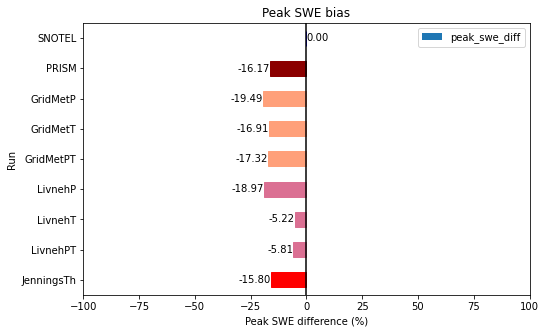

In [139]:
ax = pswe_mean_diff_df.plot(kind='barh', figsize=(8,5))
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_xlim(-100,100)
ax.axvline(0, color='black')
ax.set_title('Peak SWE bias')
ax.set_xlabel('Peak SWE difference (%)')
ax.set_ylabel('Run')
for color, bar in zip(['red','palevioletred','palevioletred','palevioletred','lightsalmon','lightsalmon','lightsalmon','darkred','blue'], ax.patches):
    bar.set_color(color)
plt.savefig(save_dir+'peak_swe_bias.png', dpi=300)

# TMP

In [2]:
import xarray as xr

In [4]:
an = xr.open_dataset('/global/cfs/cdirs/risser/PRISM_800M/TOPO_nc/PRISM_TOPO.nc')

In [6]:
an.Band1

<xarray.DataArray 'Band1' (lat: 3105, lon: 7025)>
[21812625 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 24.07 24.07 24.08 24.09 ... 49.91 49.92 49.92 49.93
  * lon      (lon) float64 -125.0 -125.0 -125.0 -125.0 ... -66.5 -66.49 -66.48
Attributes:
    long_name:     GDAL Band Number 1
    grid_mapping:  crs